<a href="https://colab.research.google.com/github/nahidislamz/Analysis-on-LFB-Incident-Data-in-Havering-Borough/blob/main/DM%26A_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining and Analysis
### Datasets: London Fire Brigade Incident data (HAVERING Rorough)
---
><b>Md Nahidul Islam</b>
</br>
> ID: 4126927
</br>


In [ ]:
#install yellowbrick to vizualize the Elbow curve
!pip install yellowbrick --quiet

# Package Imports and Datasets

---



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from google.colab import drive
from sklearn.cluster import KMeans,MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,silhouette_score,silhouette_samples
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import plotly.graph_objs as go
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer

In [ ]:
drive.mount('/content/drive')
# df = pd.read_excel('/content/drive/My Drive/LSBU/DM&A/LFB_2019-22.xlsx')

Mounted at /content/drive


### Filtering data By Brough Name

In [ ]:
# havering_data = df.loc[df['IncGeo_BoroughName'] == 'HAVERING']

## Exporting To CSV File

In [ ]:
# havering_data.to_csv('havering_data.csv', index=False)

In [ ]:
havering_data = pd.read_csv('/content/drive/My Drive/LSBU/DM&A/havering_data.csv')

In [ ]:
havering_data.head()

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
0,000139-01012019,01 Jan 2019,2019,00:45:13,0,False Alarm,AFA,NaN,Non Residential,Multi-Storey car park,...,280.0,Romford,NaN,NaN,1.0,1.0,1.0,1.0,333.0,1.0
1,000170-01012019,01 Jan 2019,2019,01:01:23,1,Fire,Secondary Fire,NaN,Outdoor Structure,Common external bin storage area,...,395.0,Dagenham,NaN,NaN,1.0,1.0,1.0,1.0,333.0,1.0
2,000270-01012019,01 Jan 2019,2019,02:09:05,2,Fire,Secondary Fire,NaN,Outdoor Structure,Fence,...,407.0,Hornchurch,NaN,NaN,1.0,1.0,1.0,1.0,333.0,2.0
3,000458-01012019,01 Jan 2019,2019,13:52:52,13,False Alarm,AFA,NaN,Other Residential,Retirement/Old Persons Home,...,247.0,Hornchurch,479.0,Harold Hill,2.0,2.0,2.0,1.0,333.0,1.0
4,000653-01012019,01 Jan 2019,2019,22:49:06,22,Fire,Secondary Fire,NaN,Outdoor Structure,Large refuse/rubbish container (eg skip/ paladin),...,481.0,Dagenham,NaN,NaN,1.0,1.0,1.0,1.0,333.0,1.0


# 1. Problem Identification


*   1.1 .Read the data description file (metadata) to learn the
basic characteristics of the dataset including the
certain business context associated with the data,
the total number of attributes (dimensions,
variables), the data type of each attribute, the value
range/mode, skewness, and kurtosis of each
attribute, the total number of instances, and simple
data exploration with essential plotting, etc.
*   1.2 Identify a set of meaningful business problems of
interest with regard to the data for analysis
*   1.3 Identify what data mining tasks need to be performed
in order to address the business problems raised.




In [ ]:
havering_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9465 entries, 0 to 9464
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   IncidentNumber                          9465 non-null   object 
 1   DateOfCall                              9465 non-null   object 
 2   CalYear                                 9465 non-null   int64  
 3   TimeOfCall                              9465 non-null   object 
 4   HourOfCall                              9465 non-null   int64  
 5   IncidentGroup                           9465 non-null   object 
 6   StopCodeDescription                     9465 non-null   object 
 7   SpecialServiceType                      3268 non-null   object 
 8   PropertyCategory                        9465 non-null   object 
 9   PropertyType                            9465 non-null   object 
 10  AddressQualifier                        9465 non-null   obje

1.1 total number of attributes (dimensions, variables)

In [ ]:
havering_data.shape

(9465, 39)

In [ ]:
havering_data.columns

Index(['IncidentNumber', 'DateOfCall', 'CalYear', 'TimeOfCall', 'HourOfCall',
       'IncidentGroup', 'StopCodeDescription', 'SpecialServiceType',
       'PropertyCategory', 'PropertyType', 'AddressQualifier', 'Postcode_full',
       'Postcode_district', 'UPRN', 'USRN', 'IncGeo_BoroughCode',
       'IncGeo_BoroughName', 'ProperCase', 'IncGeo_WardCode',
       'IncGeo_WardName', 'IncGeo_WardNameNew', 'Easting_m', 'Northing_m',
       'Easting_rounded', 'Northing_rounded', 'Latitude', 'Longitude', 'FRS',
       'IncidentStationGround', 'FirstPumpArriving_AttendanceTime',
       'FirstPumpArriving_DeployedFromStation',
       'SecondPumpArriving_AttendanceTime',
       'SecondPumpArriving_DeployedFromStation',
       'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount',
       'PumpHoursRoundUp', 'Notional Cost (£)', 'NumCalls'],
      dtype='object')

 1.1 data type of each attribute

In [ ]:
havering_data.describe()

,CalYear,HourOfCall,UPRN,USRN,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FirstPumpArriving_AttendanceTime,SecondPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
count,9465.000000,9465.000000,9.465000e+03,9.465000e+03,5543.000000,5543.000000,9465.000000,9465.000000,5543.000000,5543.000000,8896.000000,2848.000000,9192.000000,9192.000000,9403.000000,9399.000000,9399.000000,9465.000000
mean,2020.604226,13.718225,3.889595e+10,2.185193e+07,552928.412773,187612.707559,552807.569995,187980.153196,51.389917,0.204432,354.109825,475.786166,1.361945,1.409487,1.571839,1.878179,657.016810,1.467829
std,1.121781,6.162541,5.327345e+10,6.485482e+06,2008.626330,3472.562220,1954.415534,3281.485987,3.014326,0.031334,154.745939,164.349966,0.605779,0.665998,3.338013,15.569065,5395.965594,2.120883
min,2019.000000,0.000000,0.000000e+00,4.200558e+06,548476.000000,178816.000000,548450.000000,178850.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,333.000000,1.000000
25%,2020.000000,10.000000,0.000000e+00,2.130066e+07,551347.000000,185052.500000,551250.000000,186050.000000,51.542674,0.181875,262.000000,366.000000,1.000000,1.000000,1.000000,1.000000,346.000000,1.000000
50%,2021.000000,15.000000,1.003342e+10,2.130112e+07,552856.000000,188333.000000,552750.000000,188550.000000,51.572891,0.202767,329.000000,442.000000,1.000000,1.000000,1.000000,1.000000,352.000000,1.000000
75%,2022.000000,19.000000,1.000214e+11,2.130158e+07,554173.000000,190296.500000,554050.000000,190650.000000,51.590423,0.221865,420.000000,551.000000,2.000000,2.000000,2.000000,1.000000,364.000000,1.000000
max,2022.000000,23.000000,2.000031e+11,9.999008e+07,560461.000000,194799.000000,560450.000000,194750.000000,51.630916,0.313635,1196.000000,1200.000000,6.000000,7.000000,250.000000,1203.000000,407817.000000,103.000000


1.1 the value range (min and max) for each column

In [ ]:
summary_stats = havering_data.describe()
range = summary_stats.loc[['min', 'max'], :]
range

,CalYear,HourOfCall,UPRN,USRN,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FirstPumpArriving_AttendanceTime,SecondPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
min,2019.0,0.0,0.000000e+00,4200558.0,548476.0,178816.0,548450.0,178850.0,0.000000,0.000000,1.0,3.0,1.0,1.0,1.0,1.0,333.0,1.0
max,2022.0,23.0,2.000031e+11,99990079.0,560461.0,194799.0,560450.0,194750.0,51.630916,0.313635,1196.0,1200.0,6.0,7.0,250.0,1203.0,407817.0,103.0


1.1 the mode for each column

In [ ]:
havering_data.mode().iloc[0]

IncidentNumber                                      000064-01012020
DateOfCall                                              25 Jun 2021
CalYear                                                      2022.0
TimeOfCall                                                 19:19:10
HourOfCall                                                     20.0
IncidentGroup                                           False Alarm
StopCodeDescription                                 Special Service
SpecialServiceType                                         Flooding
PropertyCategory                                           Dwelling
PropertyType                              House - single occupancy 
AddressQualifier                          Correct incident location
Postcode_full                                              RM13 9FL
Postcode_district                                               RM3
UPRN                                                            0.0
USRN                                            

1.1 the skewness for each column

In [ ]:
havering_data.skew()

<ipython-input-14-0d6f08d3a29d>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  havering_data.skew()


CalYear                              -0.134231
HourOfCall                           -0.513621
UPRN                                  1.200410
USRN                                 11.852072
Easting_m                             0.588727
Northing_m                           -0.421342
Easting_rounded                       0.539801
Northing_rounded                     -0.538931
Latitude                            -16.994216
Longitude                            -0.421214
FirstPumpArriving_AttendanceTime      1.277035
SecondPumpArriving_AttendanceTime     1.190863
NumStationsWithPumpsAttending         2.054519
NumPumpsAttending                     2.279925
PumpCount                            51.559600
PumpHoursRoundUp                     59.479592
Notional Cost (£)                    57.872105
NumCalls                             18.930096
dtype: float64

1.1 the kurtosis for each column

In [ ]:
havering_data.kurtosis()

<ipython-input-15-2446b2ebe7d4>:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  havering_data.kurtosis()


CalYear                                -1.353340
HourOfCall                             -0.585086
UPRN                                    0.549047
USRN                                  139.671937
Easting_m                               0.160591
Northing_m                             -0.774861
Easting_rounded                         0.146252
Northing_rounded                       -0.600902
Latitude                              286.938196
Longitude                               5.526094
FirstPumpArriving_AttendanceTime        3.616944
SecondPumpArriving_AttendanceTime       2.324968
NumStationsWithPumpsAttending           6.264096
NumPumpsAttending                       8.222391
PumpCount                            3490.066939
PumpHoursRoundUp                     4178.312344
Notional Cost (£)                    3944.638054
NumCalls                              668.017519
dtype: float64

1.1 the total number of instances

In [ ]:
havering_data.shape[0]

9465

1.1 Plot a histogram for each column to visualize the distribution of the data

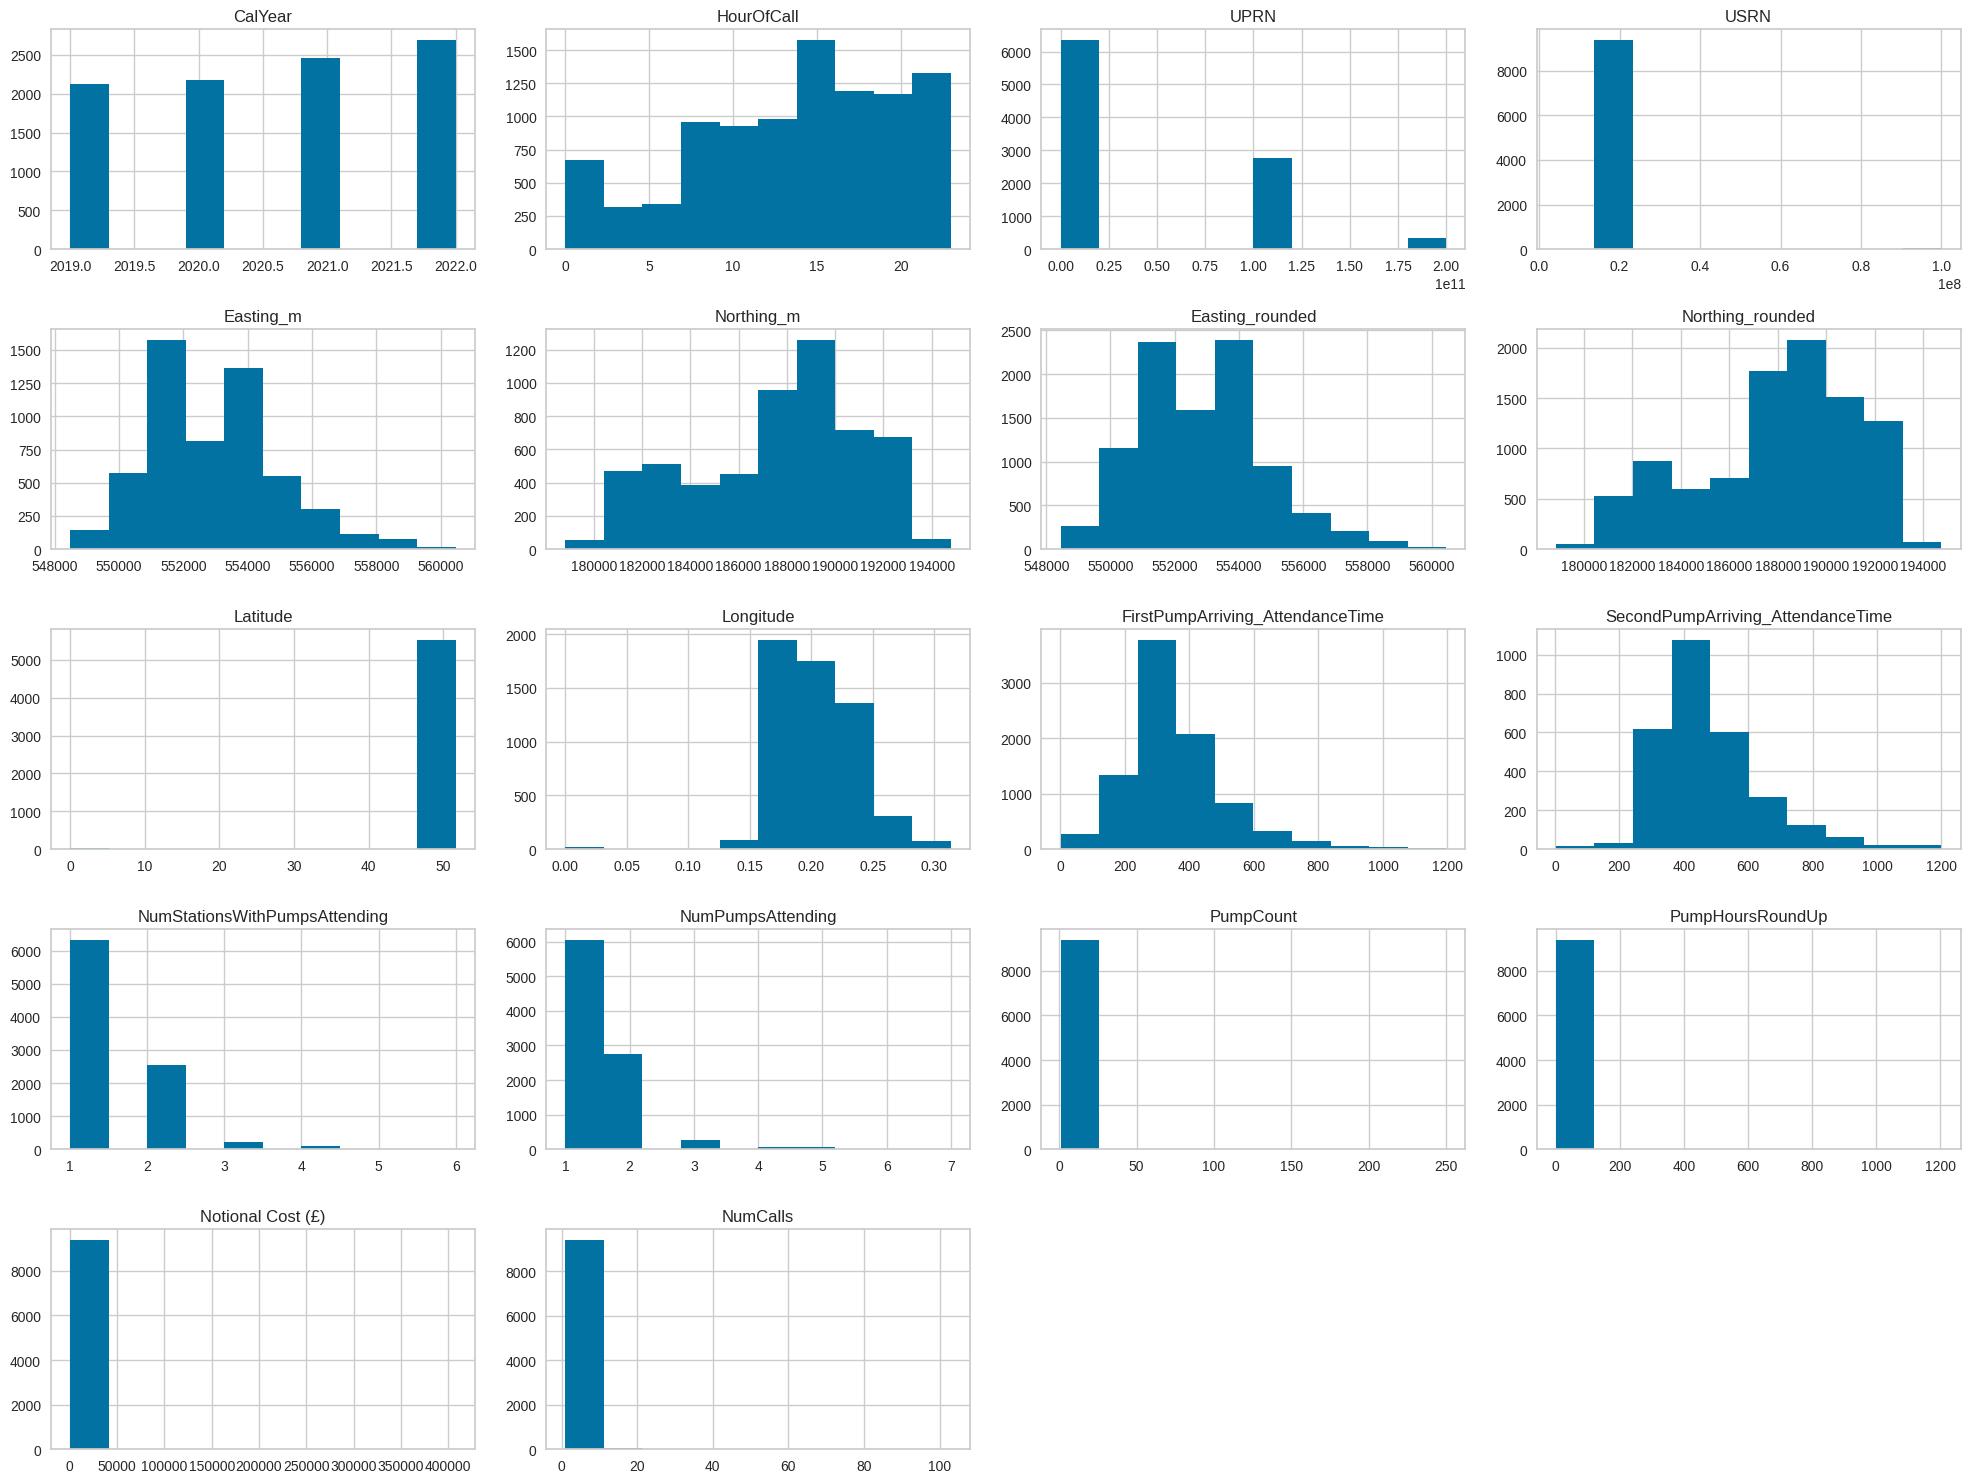

In [ ]:
havering_data.hist(bins=10, figsize=(20,15))
plt.tight_layout()
plt.show()

### **1.2 Business Problems**

1. Cost Analysis: Analyzing the costs associated with each incident would allow the London Fire Brigade to identify areas for cost savings and optimize their budget.

2. Response Time Optimization: Analyzing the response times to incidents and identifying factors that contribute to longer response times would allow the London Fire Brigade to optimize their response times and improve their overall efficiency.

3. Incident Prediction: Predicting the type and severity of incidents before they occur would allow the London Fire Brigade to better allocate resources and respond more effectively to incidents.

4. Incident Prevention: Identifying patterns and trends in incidents and using this information to develop strategies for preventing future incidents would reduce the overall number of incidents and improve public safety.

----



###**1.3 Data Mining Tasks**

* Data collection and cleaning: Collect data on London Fire Brigade incidents and clean the data to ensure that it is accurate and consistent.

* Data exploration and visualization: Explore the data and create visualizations to gain insights into the types and frequency of incidents.

* Feature selection: Select relevant features and variables that are important for addressing the business problems of interest.

* Data modeling: Build predictive models using techniques such as regression analysis, decision trees, or clustering to predict the likelihood of incidents or to identify patterns in the data.

* Model evaluation: Evaluate the performance of the models and fine-tune them as needed.

*These are some of the key data mining tasks that may need to be performed to address the business problems related to London Fire Brigade incidents.*

# 2. Data Preparation
* 2.1.Determine which variables to be used in which analysis. Also refer to 1.2. and 1.3. Task 1.
* 2.2.Get your data for analysis. Choose appropriate methods for data pre-processing, including detecting and dealing with incorrect data types, irrelevant variables, missing values, outliers, imbalanced classes, and duplicates, changing data type, and conducting proper dimensionality reduction, feature extraction, data transformation, data partition, and normalisation, etc. where appropriate. Also refer to 1.1. Task 1.

#### Data Cleaning

In [ ]:
def check_null_values(datasets):
  nul_val = datasets.isna()
  n= nul_val.sum()
  print(n)

In [ ]:
havering_data.head(5)

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
0,000139-01012019,01 Jan 2019,2019,00:45:13,0,False Alarm,AFA,NaN,Non Residential,Multi-Storey car park,...,280.0,Romford,NaN,NaN,1.0,1.0,1.0,1.0,333.0,1.0
1,000170-01012019,01 Jan 2019,2019,01:01:23,1,Fire,Secondary Fire,NaN,Outdoor Structure,Common external bin storage area,...,395.0,Dagenham,NaN,NaN,1.0,1.0,1.0,1.0,333.0,1.0
2,000270-01012019,01 Jan 2019,2019,02:09:05,2,Fire,Secondary Fire,NaN,Outdoor Structure,Fence,...,407.0,Hornchurch,NaN,NaN,1.0,1.0,1.0,1.0,333.0,2.0
3,000458-01012019,01 Jan 2019,2019,13:52:52,13,False Alarm,AFA,NaN,Other Residential,Retirement/Old Persons Home,...,247.0,Hornchurch,479.0,Harold Hill,2.0,2.0,2.0,1.0,333.0,1.0
4,000653-01012019,01 Jan 2019,2019,22:49:06,22,Fire,Secondary Fire,NaN,Outdoor Structure,Large refuse/rubbish container (eg skip/ paladin),...,481.0,Dagenham,NaN,NaN,1.0,1.0,1.0,1.0,333.0,1.0


In [ ]:
havering_data.columns

Index(['IncidentNumber', 'DateOfCall', 'CalYear', 'TimeOfCall', 'HourOfCall',
       'IncidentGroup', 'StopCodeDescription', 'SpecialServiceType',
       'PropertyCategory', 'PropertyType', 'AddressQualifier', 'Postcode_full',
       'Postcode_district', 'UPRN', 'USRN', 'IncGeo_BoroughCode',
       'IncGeo_BoroughName', 'ProperCase', 'IncGeo_WardCode',
       'IncGeo_WardName', 'IncGeo_WardNameNew', 'Easting_m', 'Northing_m',
       'Easting_rounded', 'Northing_rounded', 'Latitude', 'Longitude', 'FRS',
       'IncidentStationGround', 'FirstPumpArriving_AttendanceTime',
       'FirstPumpArriving_DeployedFromStation',
       'SecondPumpArriving_AttendanceTime',
       'SecondPumpArriving_DeployedFromStation',
       'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount',
       'PumpHoursRoundUp', 'Notional Cost (£)', 'NumCalls'],
      dtype='object')

### Checking Null Values For Havering Data

In [ ]:
check_null_values(havering_data)

IncidentNumber                               0
DateOfCall                                   0
CalYear                                      0
TimeOfCall                                   0
HourOfCall                                   0
IncidentGroup                                0
StopCodeDescription                          0
SpecialServiceType                        6197
PropertyCategory                             0
PropertyType                                 0
AddressQualifier                             0
Postcode_full                             3922
Postcode_district                            0
UPRN                                         0
USRN                                         0
IncGeo_BoroughCode                           0
IncGeo_BoroughName                           0
ProperCase                                   0
IncGeo_WardCode                              0
IncGeo_WardName                              0
IncGeo_WardNameNew                           0
Easting_m    

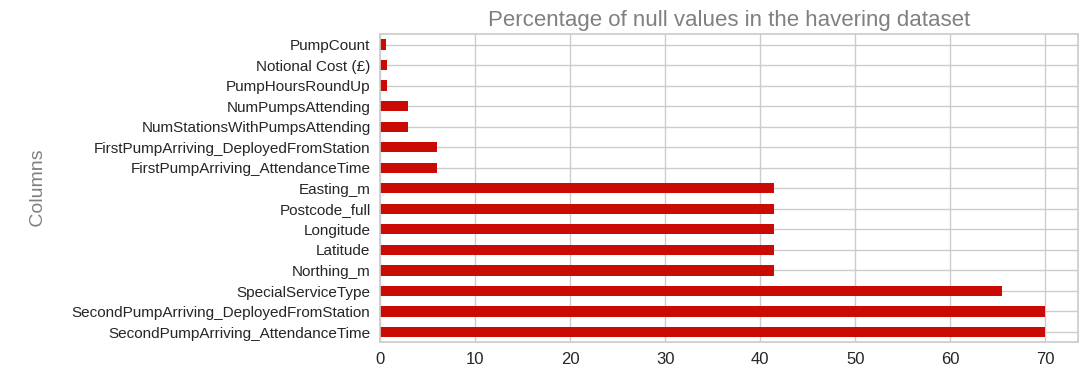

In [ ]:
a = (havering_data.isna().sum().sort_values(ascending=False)/len(havering_data))*100
plt.figure(figsize=(9,4))
plt.title("Percentage of null values in the havering dataset",size=16,color="grey")
plt.xlabel('\n Percentage (%) \n', fontsize=14, color='grey')
plt.ylabel('\n Columns \n', fontsize=14, color='grey')
plt.xticks(fontsize=12)
plt.yticks(fontsize=11)
a[a!=0].plot(kind="barh",color="r")
plt.show()

### Coulmns To Drop
IncidentNumber                                  
HourOfCall
SpecialServiceType 
AddressQualifier                             
Postcode_full                             
UPRN
USRN
IncGeo_BoroughCode
IncGeo_WardCode                              
IncGeo_WardName
Easting_m                                 
Northing_m
Easting_rounded     
Northing_rounded
Latitude                         
Longitude                       
SecondPumpArriving_AttendanceTime        
SecondPumpArriving_DeployedFromStation                 
NumPumpsAttending       
IncGeo_BoroughCode
IncGeo_BoroughName
PumpHoursRoundUp

-----
Column To Fix
* FirstPumpArriving_AttendanceTime
* PumpCount   
* NumStationsWithPumpsAttending                             
* Notional Cost (£)                           







### Removing Unnecessary Columns

In [ ]:
#havering_data.dropna(inplace=True)
columns_to_drop = [ 
                  'SpecialServiceType', 
                  'AddressQualifier', 
                  'Postcode_full',
                  'UPRN', 'USRN', 
                  'IncGeo_BoroughCode',
                  'IncGeo_BoroughName', 
                  'ProperCase',
                  'IncGeo_WardCode', 
                  'IncGeo_WardName', 
                  'Easting_m',
                  'Northing_m', 
                  'Easting_rounded', 
                  'Northing_rounded', 
                  'Latitude', 
                  'Longitude',
                  'FRS',
                  'FirstPumpArriving_DeployedFromStation',
                  'SecondPumpArriving_AttendanceTime', 
                  'SecondPumpArriving_DeployedFromStation',
                  'PumpHoursRoundUp'
                  ]

In [ ]:
data = havering_data.drop(columns_to_drop, axis=1)

In [ ]:
data.head()

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,PropertyCategory,PropertyType,Postcode_district,IncGeo_WardNameNew,IncidentStationGround,FirstPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,Notional Cost (£),NumCalls
0,000139-01012019,01 Jan 2019,2019,00:45:13,0,False Alarm,AFA,Non Residential,Multi-Storey car park,RM1,St. Edward's,Romford,280.0,1.0,1.0,1.0,333.0,1.0
1,000170-01012019,01 Jan 2019,2019,01:01:23,1,Fire,Secondary Fire,Outdoor Structure,Common external bin storage area,RM7,Rush Green & Crowlands,Dagenham,395.0,1.0,1.0,1.0,333.0,1.0
2,000270-01012019,01 Jan 2019,2019,02:09:05,2,Fire,Secondary Fire,Outdoor Structure,Fence,RM12,Hacton,Hornchurch,407.0,1.0,1.0,1.0,333.0,2.0
3,000458-01012019,01 Jan 2019,2019,13:52:52,13,False Alarm,AFA,Other Residential,Retirement/Old Persons Home,RM14,Cranham,Hornchurch,247.0,2.0,2.0,2.0,333.0,1.0
4,000653-01012019,01 Jan 2019,2019,22:49:06,22,Fire,Secondary Fire,Outdoor Structure,Large refuse/rubbish container (eg skip/ paladin),RM13,South Hornchurch,Dagenham,481.0,1.0,1.0,1.0,333.0,1.0


In [ ]:
len(havering_data.columns)

39

In [ ]:
havering_data.shape

(9465, 39)

In [ ]:
len(data.columns)

18

In [ ]:
data.shape

(9465, 18)

### Filling Null Values with Mean Median Mode

In [ ]:
mean = havering_data.mean()
mode = havering_data.mode().iloc[0]
median = havering_data.median()

# Fill the missing values in each column with the mean, mode, or median
data['FirstPumpArriving_AttendanceTime'] = data['FirstPumpArriving_AttendanceTime'].fillna(mean['FirstPumpArriving_AttendanceTime'])
data['Notional Cost (£)'] = data['Notional Cost (£)'].fillna(mode['Notional Cost (£)'])
data['PumpCount'] = data['PumpCount'].fillna(median['PumpCount'])
data['NumStationsWithPumpsAttending'] =  data['NumStationsWithPumpsAttending'].fillna(median['NumStationsWithPumpsAttending'])
data['NumPumpsAttending'] = data['NumPumpsAttending'].fillna(median['NumPumpsAttending'])

<ipython-input-30-8fa94d8c9884>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = havering_data.mean()
<ipython-input-30-8fa94d8c9884>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median = havering_data.median()


In [ ]:
check_null_values(data)

IncidentNumber                      0
DateOfCall                          0
CalYear                             0
TimeOfCall                          0
HourOfCall                          0
IncidentGroup                       0
StopCodeDescription                 0
PropertyCategory                    0
PropertyType                        0
Postcode_district                   0
IncGeo_WardNameNew                  0
IncidentStationGround               0
FirstPumpArriving_AttendanceTime    0
NumStationsWithPumpsAttending       0
NumPumpsAttending                   0
PumpCount                           0
Notional Cost (£)                   0
NumCalls                            0
dtype: int64


### Checking Duplicates

In [ ]:
# Check for duplicates in the 'IncidentNumber' column
duplicate_mask = data['IncidentNumber'].duplicated(keep=False)

# Subset the DataFrame to show only rows that have duplicates in the 'IncidentNumber' column
duplicate_rows = data[duplicate_mask].sort_values(by='IncidentNumber')

# Print the duplicate rows
print(duplicate_rows)

Empty DataFrame
Columns: [IncidentNumber, DateOfCall, CalYear, TimeOfCall, HourOfCall, IncidentGroup, StopCodeDescription, PropertyCategory, PropertyType, Postcode_district, IncGeo_WardNameNew, IncidentStationGround, FirstPumpArriving_AttendanceTime, NumStationsWithPumpsAttending, NumPumpsAttending, PumpCount, Notional Cost (£), NumCalls]
Index: []


In [ ]:
data.columns

Index(['IncidentNumber', 'DateOfCall', 'CalYear', 'TimeOfCall', 'HourOfCall',
       'IncidentGroup', 'StopCodeDescription', 'PropertyCategory',
       'PropertyType', 'Postcode_district', 'IncGeo_WardNameNew',
       'IncidentStationGround', 'FirstPumpArriving_AttendanceTime',
       'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount',
       'Notional Cost (£)', 'NumCalls'],
      dtype='object')

### Change DateOfCall column to Date type

In [ ]:
data['DateOfCall'] = pd.to_datetime(data['DateOfCall'])

## Checking Outliers on Numerical Columns

In [ ]:
num_cols = ['CalYear', 'HourOfCall', 'FirstPumpArriving_AttendanceTime', 'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount', 'Notional Cost (£)', 'NumCalls']
df_num = data[num_cols]

In [ ]:
def check_outliers(data, plot=True):
    # calculate summary statistics for the Notional Cost column
    summary = data.describe()

    # calculate interquartile range for the column
    q1 = summary.loc['25%']
    q3 = summary.loc['75%']
    iqr = q3 - q1

    # identify potential outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = ((data < lower_bound) | (data > upper_bound))

    # calculate the number and percentage of outliers
    num_outliers = outliers.sum()
    pct_outliers = num_outliers / len(data) * 100

    print(f"Number of outliers:\n{num_outliers}")
    #print(f"Percentage of outliers: {pct_outliers:.2f}%")


In [ ]:
check_outliers(df_num)

Number of outliers:
CalYear                                0
HourOfCall                             0
FirstPumpArriving_AttendanceTime     643
NumStationsWithPumpsAttending        107
NumPumpsAttending                    137
PumpCount                            260
Notional Cost (£)                   1583
NumCalls                            1895
dtype: int64


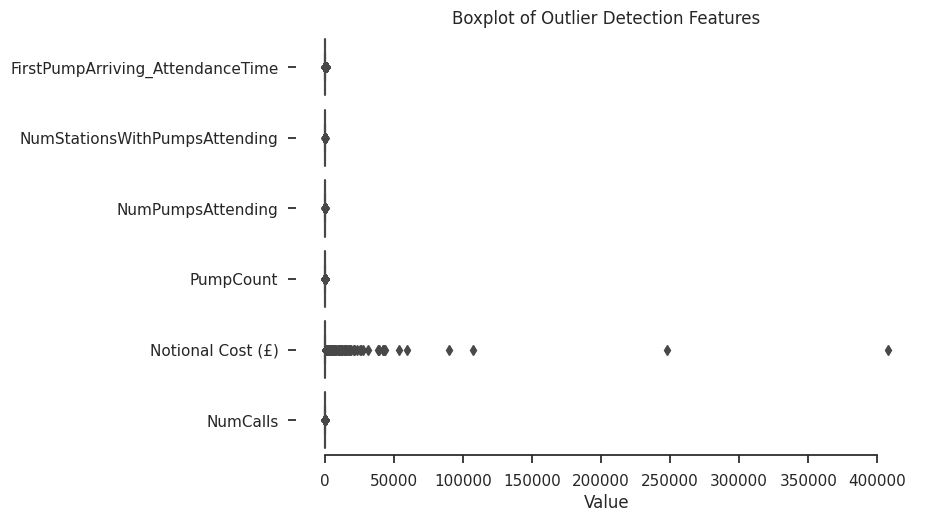

In [ ]:
outlier_cols = ['FirstPumpArriving_AttendanceTime', 'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount', 'Notional Cost (£)', 'NumCalls']

sns.set(style="ticks")
ax = sns.boxplot(data=data[outlier_cols], orient="h", palette="Set1")
ax.set_xlabel('Value')
ax.set_title('Boxplot of Outlier Detection Features')
sns.despine(trim=True, left=True)
plt.show()


#### Finding The Boundry Value

In [ ]:
print("FirstPumpArriving:")
print("\tHighest allowed",data['FirstPumpArriving_AttendanceTime'].mean() + 3*data['FirstPumpArriving_AttendanceTime'].std())
print("\tLowest allowed",data['FirstPumpArriving_AttendanceTime'].mean() - 3*data['FirstPumpArriving_AttendanceTime'].std())
print("\nNational Cost:")
print("\tHighest allowed",data['Notional Cost (£)'].mean() + 3*data['Notional Cost (£)'].std())
print("\tLowest allowed",data['Notional Cost (£)'].mean() - 3*data['Notional Cost (£)'].std())
print("\nNumPumpsAttending:")
print("\tHighest allowed",data['NumPumpsAttending'].mean() + 3*data['NumPumpsAttending'].std())
print("\tLowest allowed",data['NumPumpsAttending'].mean() - 3*data['NumPumpsAttending'].std())
print("\nPumpCount:")
print("\tHighest allowed",data['PumpCount'].mean() + 3*data['PumpCount'].std())
print("\tLowest allowed",data['PumpCount'].mean() - 3*data['PumpCount'].std())

FirstPumpArriving:
	Highest allowed 804.1757408832812
	Lowest allowed -95.95609160270573

National Cost:
	Highest allowed 16786.422125481273
	Lowest allowed -15476.642305090358

NumPumpsAttending:
	Highest allowed 3.3773467333604295
	Lowest allowed -0.5819954391184856

PumpCount:
	Highest allowed 11.550237201236552
	Lowest allowed -8.414051253006232


## Remove outliers from the DataFrame

In [ ]:
data_trimmed = data.copy()

In [ ]:
data_trimmed['FirstPumpArriving_AttendanceTime']=data[(data['FirstPumpArriving_AttendanceTime'] > 804.17) | (data['FirstPumpArriving_AttendanceTime'] < -95.95)]['FirstPumpArriving_AttendanceTime']
data_trimmed['Notional Cost (£)']=data[(data['Notional Cost (£)'] > 16786.42) | (data['Notional Cost (£)'] < -15476.64)]['Notional Cost (£)']

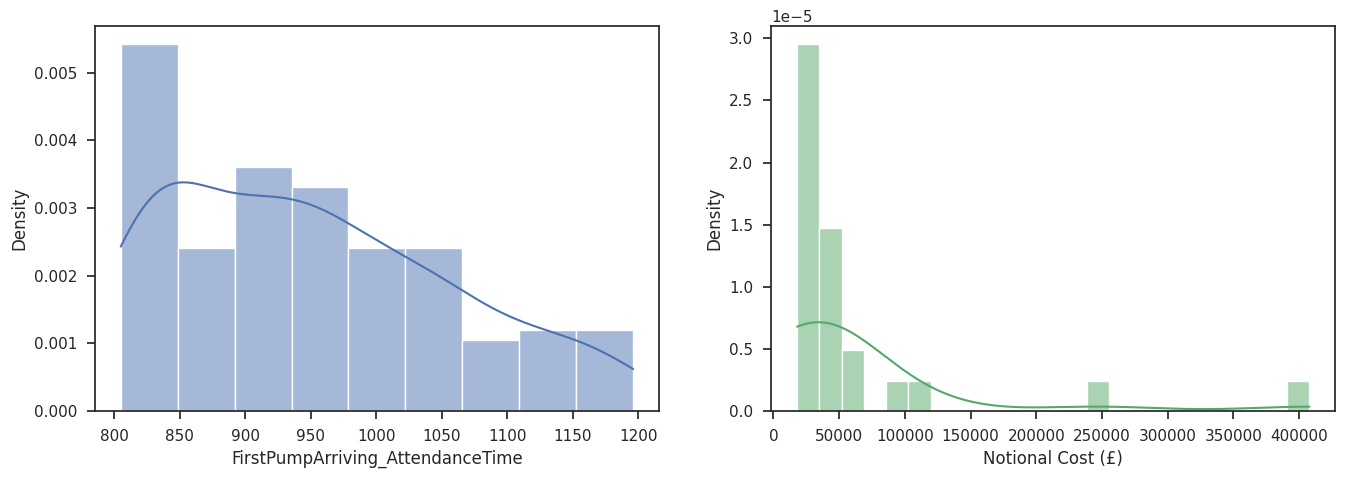

In [ ]:
#data_trimmed['Notional Cost (£)']=data[(data['Notional Cost (£)'] > 16786.42) | (data['Notional Cost (£)'] < -15476.64)]['Notional Cost (£)']
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(data_trimmed['FirstPumpArriving_AttendanceTime'],kde=True,stat="density")
plt.subplot(1,2,2)
sns.histplot(data_trimmed['Notional Cost (£)'],kde=True,stat="density",color='g')
plt.show()

In [ ]:

data_trimmed['FirstPumpArriving_AttendanceTime'] = data[(data['FirstPumpArriving_AttendanceTime'] < 804.17) & 
                                                        (data['FirstPumpArriving_AttendanceTime'] > -95.95)]['FirstPumpArriving_AttendanceTime']
data_trimmed['Notional Cost (£)'] = data[(data['Notional Cost (£)'] < 16786.42) & (data['Notional Cost (£)'] > -15476.64)]['Notional Cost (£)']


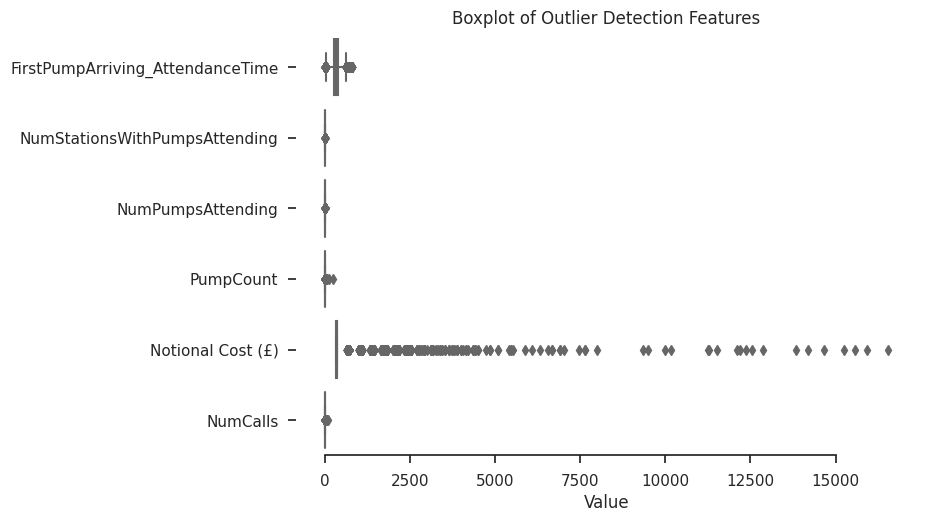

In [ ]:
outlier_cols = ['FirstPumpArriving_AttendanceTime', 'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount', 'Notional Cost (£)', 'NumCalls']
sns.set(style="ticks")
ax = sns.boxplot(data=data_trimmed[outlier_cols], orient="h", palette="Set3")
ax.set_xlabel('Value')
ax.set_title('Boxplot of Outlier Detection Features')
sns.despine(trim=True, left=True)
plt.show()

In [ ]:
check_outliers(data_trimmed[outlier_cols])

Number of outliers:
FirstPumpArriving_AttendanceTime     528
NumStationsWithPumpsAttending        107
NumPumpsAttending                    137
PumpCount                            260
Notional Cost (£)                   1559
NumCalls                            1895
dtype: int64


In [ ]:
data.shape

(9465, 18)

In [ ]:
check_null_values(data_trimmed)

IncidentNumber                        0
DateOfCall                            0
CalYear                               0
TimeOfCall                            0
HourOfCall                            0
IncidentGroup                         0
StopCodeDescription                   0
PropertyCategory                      0
PropertyType                          0
Postcode_district                     0
IncGeo_WardNameNew                    0
IncidentStationGround                 0
FirstPumpArriving_AttendanceTime    153
NumStationsWithPumpsAttending         0
NumPumpsAttending                     0
PumpCount                             0
Notional Cost (£)                    24
NumCalls                              0
dtype: int64


## Removing null rows

In [ ]:
data_trimmed.dropna(inplace=True)

In [ ]:
data_trimmed.shape

(9289, 18)

# Exploratory Data Analysis
- Number of Fire Incidents over Time
- Number of Unique Wards in Havering
- Top 10 affected Wards in Havering
- Incident Type Analysis
- Property Type Affected by Fire
- Property Category Affected By Fires
- Total Cost and average cost
- Property Category With Higest Total National Cost
- False Alarms by Stop Code Description

### Number of Fire Incidents over year

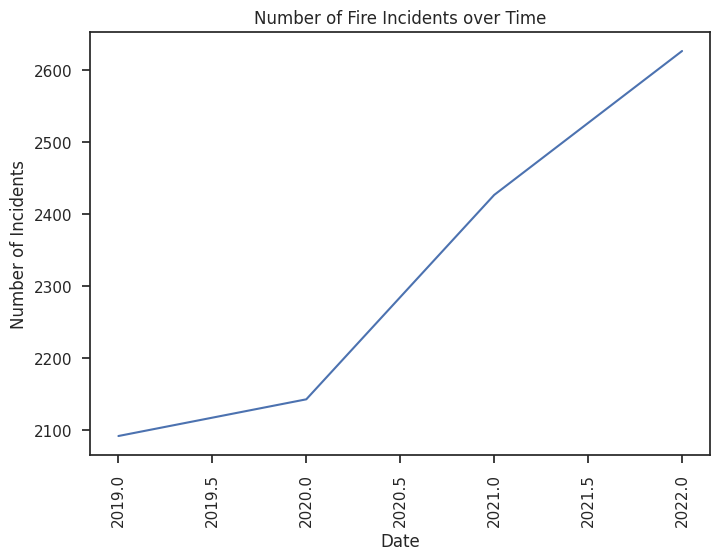

In [ ]:
# Group data by date and count the number of incidents
incidents_by_date = data_trimmed.groupby('CalYear')['IncidentNumber'].count()
# Create line plot of incidents over time
plt.plot(incidents_by_date.index, incidents_by_date.values)
# Set plot title and axis labels
plt.title('Number of Fire Incidents over Time')
plt.xticks(rotation=90) 
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.show()

### Top 10 Wards in Havering By Incidents

In [ ]:
ward_by_accident = data_trimmed.IncGeo_WardNameNew.value_counts()
ward_by_accident[:10]

St. Edward's              762
Rainham & Wennington      676
Heaton                    636
Gooshays                  627
Rush Green & Crowlands    504
Havering-atte-Bower       385
St. Andrew's              375
Harold Wood               369
Squirrel's Heath          366
Marshalls & Rise Park     340
Name: IncGeo_WardNameNew, dtype: int64

<Axes: >

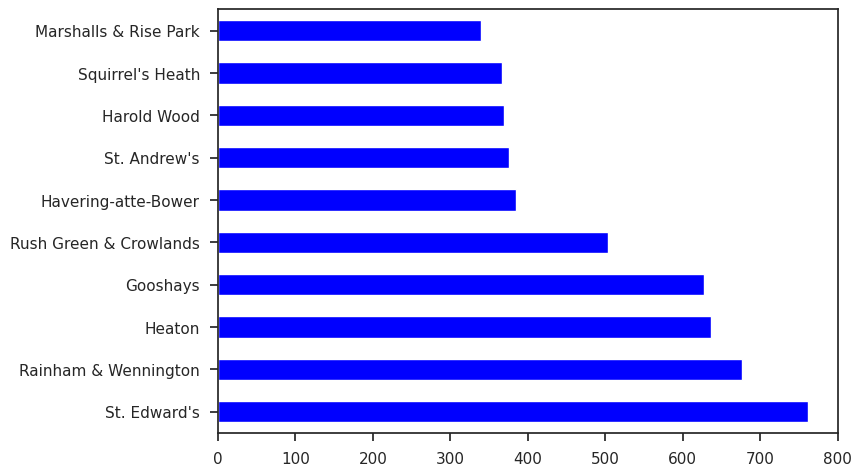

In [ ]:
ward_by_accident[:10].plot(kind='barh',color ='blue')



*   St. Edward's has the highest number of fire incidents.
*   Rainham & Wennington has the second highest number of incidents.
*   The lowest number of incidents occured in Marshalls & Rise Park.


### Most Occurence of incident type

In [ ]:
data_trimmed.IncidentGroup.unique()

array(['False Alarm', 'Fire', 'Special Service'], dtype=object)

In [ ]:
incident_type = data_trimmed.IncidentGroup.value_counts()
incident_type

False Alarm        3946
Special Service    3211
Fire               2132
Name: IncidentGroup, dtype: int64

<Axes: >

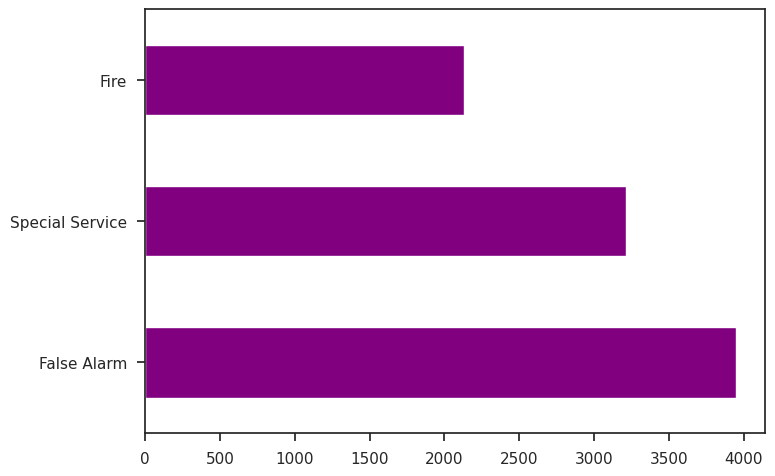

In [ ]:
incident_type[:10].plot(kind='barh',color='purple')

### Top 5 Property Affected by each type of incident

In [ ]:
def bar_plot(property_counts,text):
  # Create a bar plot of the incident counts by property type
  #plt.figure(figsize=(10,6))
  sns.barplot(data=property_counts[:5], x='PropertyType', y='IncidentNumber')
  plt.xticks(rotation=90) 
  plt.xlabel('Property Type')
  plt.ylabel('Incident Count')
  plt.title(text)
  plt.show()

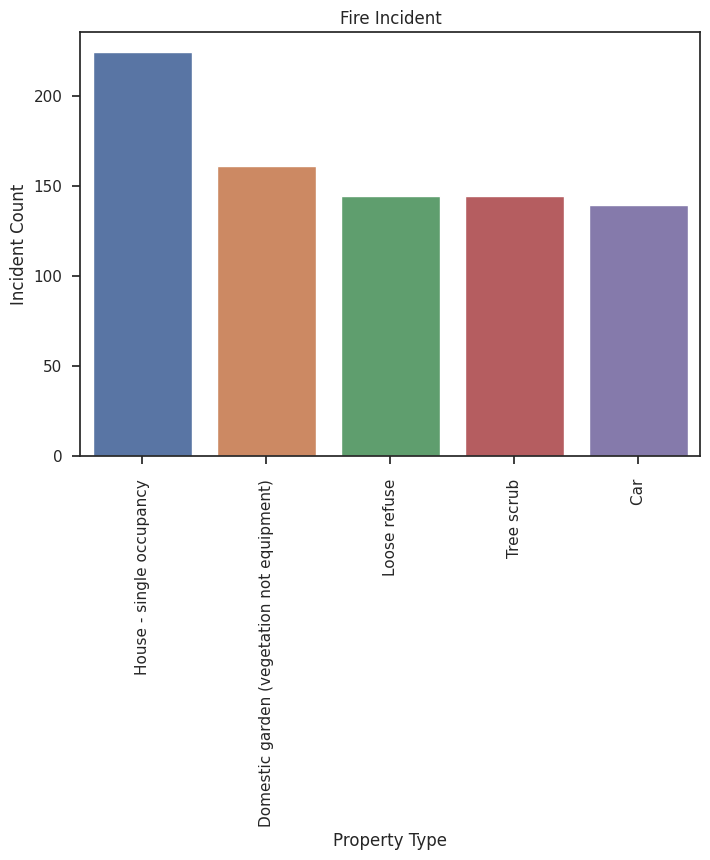

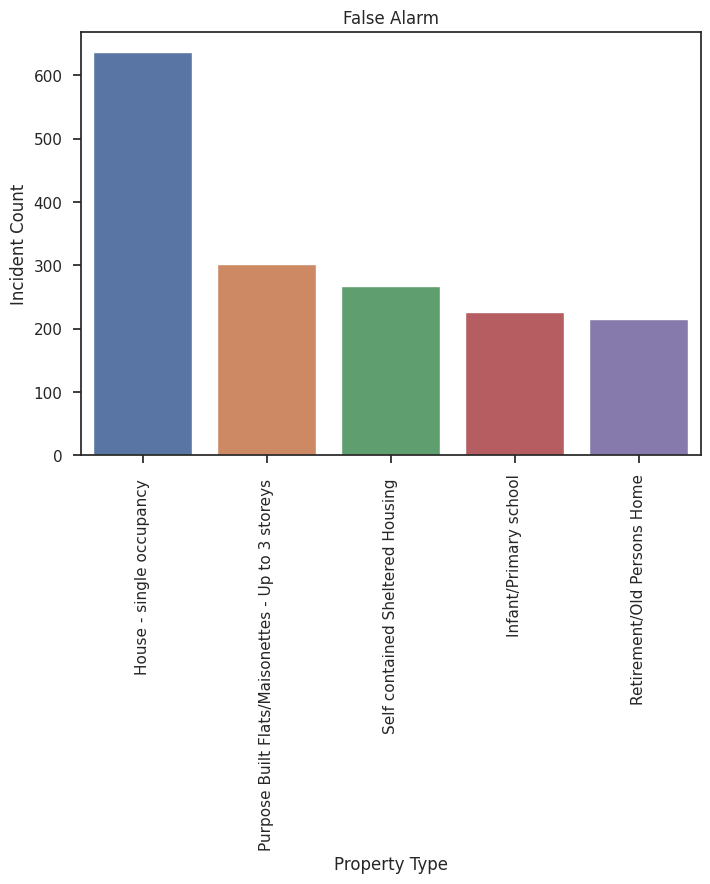

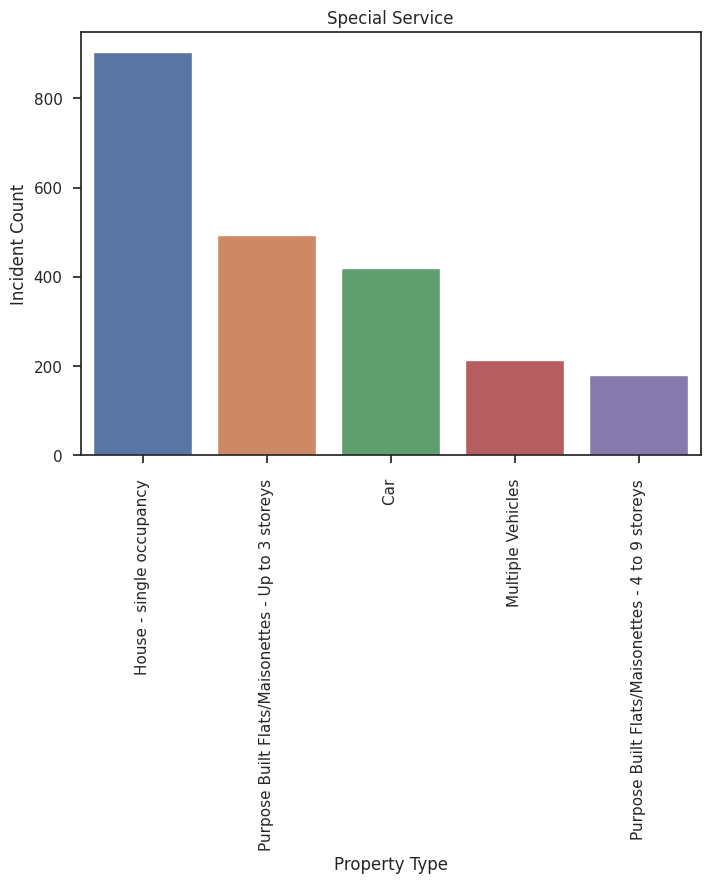

In [ ]:
df_fire = data_trimmed.loc[data['IncidentGroup'] == 'Fire']

# Compute the incident counts by property type
group_by_fire = df_fire.groupby('PropertyType')['IncidentNumber'].count().reset_index()
group_by_fire = group_by_fire.sort_values('IncidentNumber', ascending=False)
bar_plot(group_by_fire,'Fire Incident')

df_fa = data_trimmed.loc[data['IncidentGroup'] == 'False Alarm']
group_by_false_alarm = df_fa.groupby('PropertyType')['IncidentNumber'].count().reset_index()
group_by_false_alarm = group_by_false_alarm.sort_values('IncidentNumber', ascending=False)
bar_plot(group_by_false_alarm,'False Alarm')

df_sp = data_trimmed.loc[data['IncidentGroup'] == 'Special Service']
group_by_sp = df_sp.groupby('PropertyType')['IncidentNumber'].count().reset_index()
group_by_sp = group_by_sp.sort_values('IncidentNumber', ascending=False)
bar_plot(group_by_sp,'Special Service')

- The most affected property by fire is House Single Ocupancy
- Higest number of false alarm came from House Single Ocupancy
- Higest number of Special Service needed there as well

### Percentages of Property Category Affected By Each Incident Group

In [ ]:
def pie_plot(property_counts,text):
  # Create a pie chart to visualize the percentages
  #plt.figure(figsize=(10,10))
  plt.pie(property_counts, labels=property_counts.index, autopct='%1.1f%%')
  plt.title('Percentage of Property Categories Affected by '+str(text))
  plt.show()

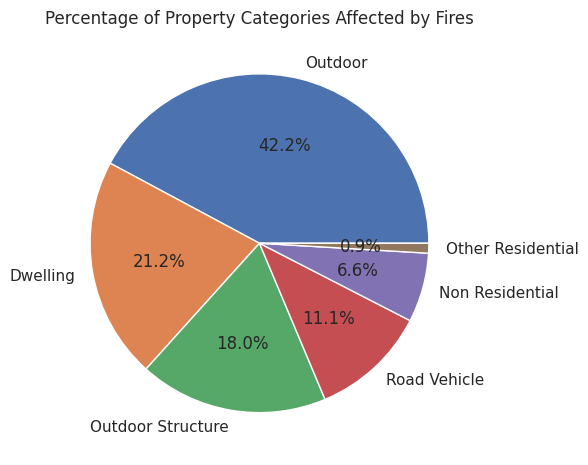

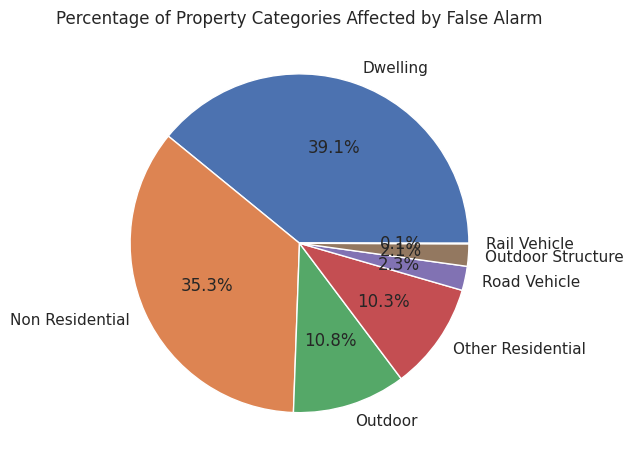

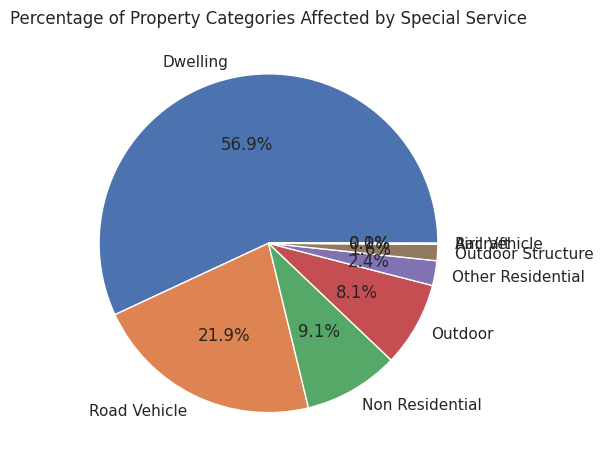

In [ ]:
# Calculate the percentage of incidents in each property category
property_counts = df_fire['PropertyCategory'].value_counts(normalize=True) * 100
pie_plot(property_counts ,'Fires')

# Calculate the percentage of incidents in each property category
property_counts = df_fa['PropertyCategory'].value_counts(normalize=True) * 100
pie_plot(property_counts ,'False Alarm')

# Calculate the percentage of incidents in each property category
property_counts = df_sp['PropertyCategory'].value_counts(normalize=True) * 100
pie_plot(property_counts ,'Special Service')

- Most affected property by fire is Outdoor
- Dwelling has highest number of False Alarm & Special Service.

> Questions?
- Which Outdoor properties are most affected?


In [ ]:
outdoor_property = data_trimmed.loc[data['PropertyCategory'] == 'Outdoor']

In [ ]:
outdoor_property.PropertyType.count()

1586

In [ ]:
len(outdoor_property.PropertyType.unique())

31

### Most Outdoor Property Affected By Fire

Text(0.5, 1.0, 'Distribution of Outdoor Property Affected by Fires')

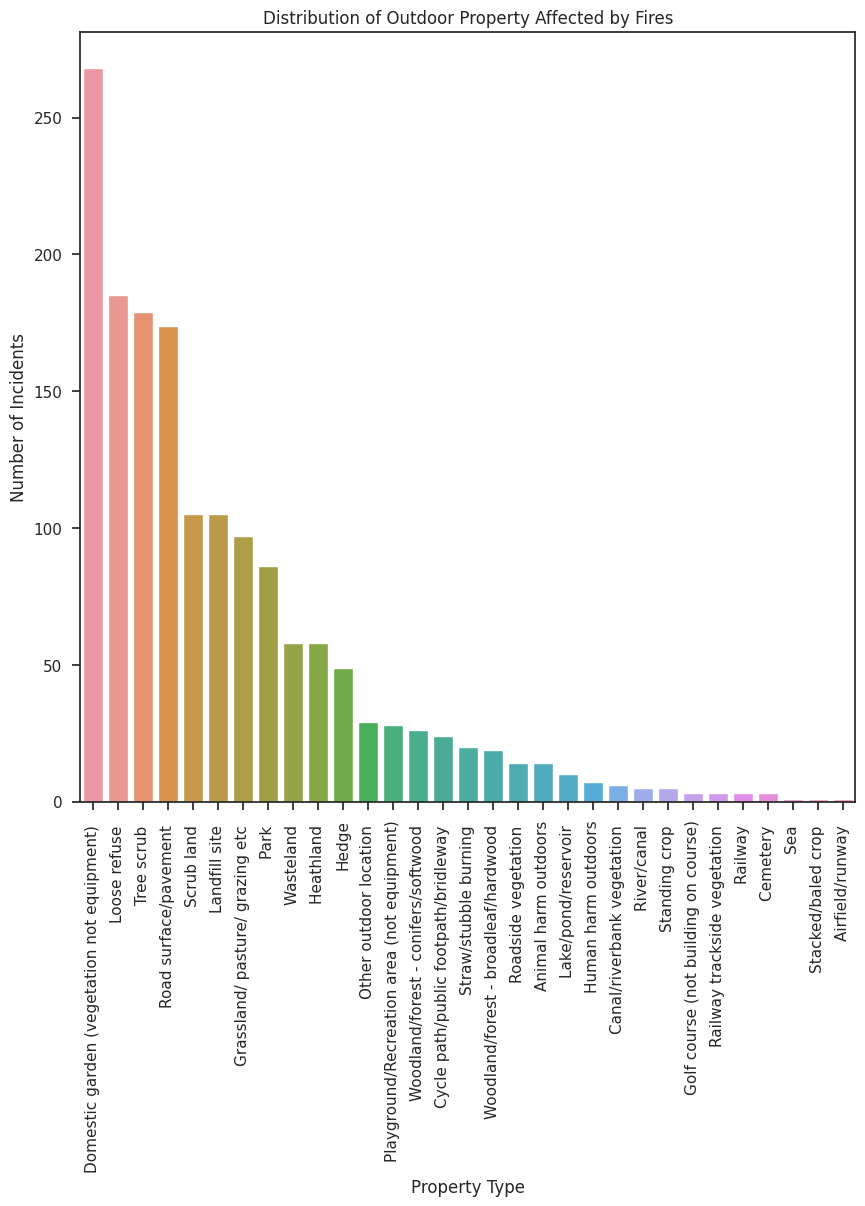

In [ ]:
property_counts = outdoor_property.groupby('PropertyType')['IncidentNumber'].count().reset_index()
property_counts = property_counts.sort_values('IncidentNumber', ascending=False)
# Create a bar plot of the incident counts by property type
plt.figure(figsize=(10,10))
sns.barplot(data=property_counts, x='PropertyType', y='IncidentNumber')
plt.xticks(rotation=90)

# Add axis labels and a title
plt.xlabel('Property Type')
plt.ylabel('Number of Incidents')
plt.title('Distribution of Outdoor Property Affected by Fires')

- Domestic Garden(vegetation not equpment) is the moset affected outdoor property.

In [ ]:
len(outdoor_property.DateOfCall.unique())

831

### Rate of Fire incident by Month

<ipython-input-65-063d10c2b2bc>:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="Month", y="Incidents", data=top_incidents_df, palette='rainbow')


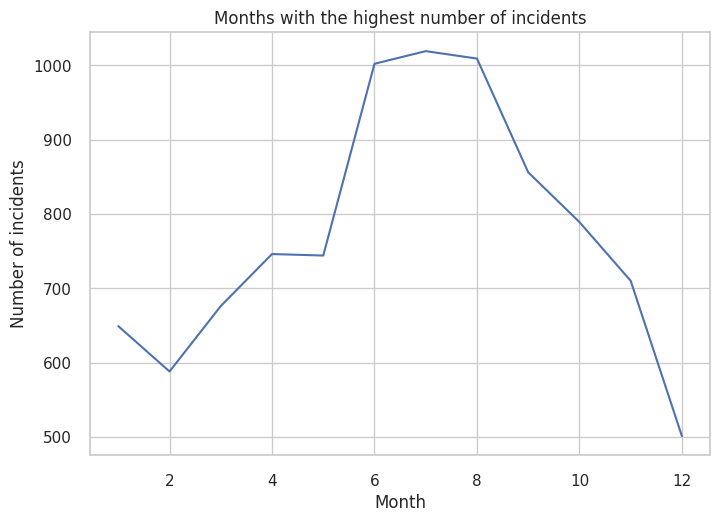

In [ ]:
# Convert the DateOfCall column to a datetime type
data_trimmed['DateOfCall'] = pd.to_datetime(data_trimmed['DateOfCall'])
data_trimmed['Month'] = data_trimmed['DateOfCall'].dt.month
# Group the data_trimmed by month and count the number of incidents
incidents_by_month = data_trimmed.groupby(data_trimmed['Month'])['IncidentNumber'].count()


# Convert the top incidents series into a DataFrame
top_incidents_df = incidents_by_month.reset_index()
top_incidents_df.columns = ['Month', 'Incidents']

# Create a bar plot of the top 5 incidents by month
#plt.figure(figsize=(12,8))
sns.set(style="whitegrid")
sns.lineplot(x="Month", y="Incidents", data=top_incidents_df, palette='rainbow')
plt.title("Months with the highest number of incidents")
plt.xlabel("Month")
plt.ylabel("Number of incidents")
plt.show()

- July has the highest rate of Fire incidents
- December has the lowest rate fo Fire incidents

### Occurrence Of Fire Incident By Time

Text(0.5, 1.0, 'Distribution of Time when most Fire incident occurs')

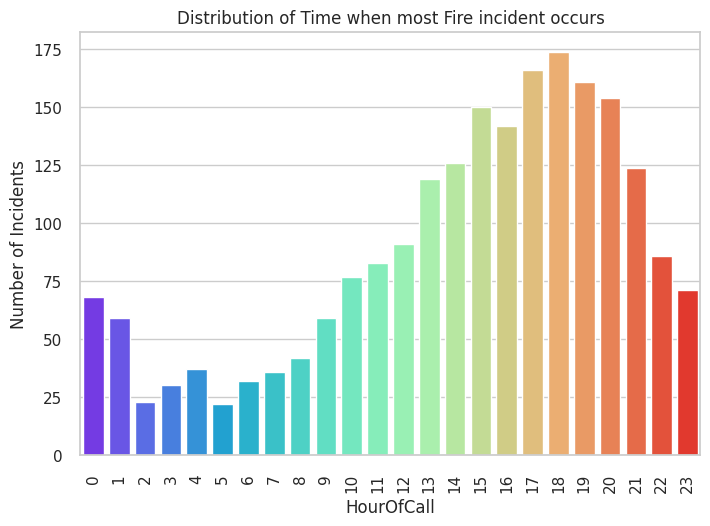

In [ ]:
# Group the data by HourOfCall, and count the number of incidents in each category
property_counts = df_fire.groupby('HourOfCall')['IncidentNumber'].count().reset_index()
#property_counts = property_counts.sort_values('IncidentNumber',ascending=False)

# Create a bar plot of the incident counts by property type
#plt.figure(figsize=(12,12))
sns.barplot(data=property_counts, x='HourOfCall', y='IncidentNumber',palette="rainbow")
plt.xticks(rotation=90)

# Add axis labels and a title
plt.xlabel('HourOfCall')
plt.ylabel('Number of Incidents')
plt.title('Distribution of Time when most Fire incident occurs')

- Most Fire Incident happens arround 6:00PM 

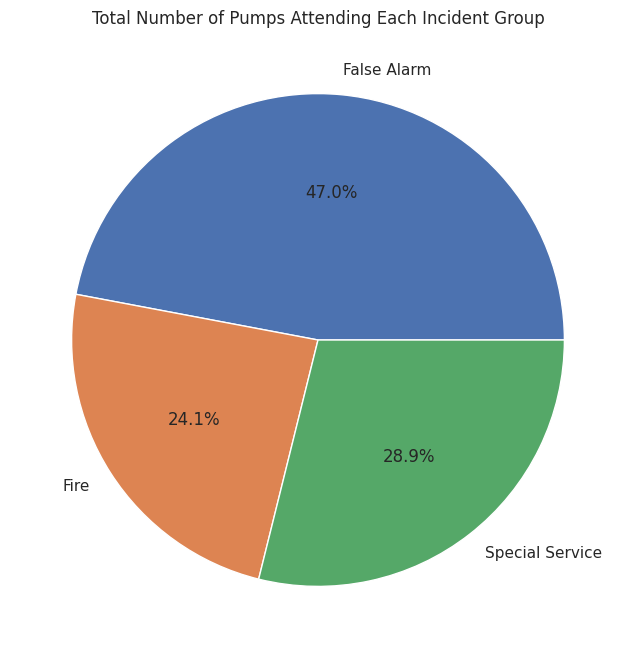

In [ ]:
# Group the dataset by the 'IncidentGroup' column and calculate the average and sum of the 'NumPumpsAttending' column for each group
response_by_group = data_trimmed.groupby('IncidentGroup')['NumPumpsAttending'].agg(['mean', 'sum'])
# Create a pie chart to visualize the total number of pumps attending for each incident group
fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(response_by_group['sum'], labels=response_by_group.index, autopct='%1.1f%%')
ax.set_title('Total Number of Pumps Attending Each Incident Group')
plt.show()

### Cost Analysis
- Find the highest cost incident group
- Find the average national cost

In [ ]:
# Group the data by IncidentGroup and calculate the average cost for each group
avg_cost_by_group = data_trimmed.groupby('IncidentGroup')['Notional Cost (£)'].mean().reset_index()
# Sort the groups by average cost in descending order
avg_cost_by_group = avg_cost_by_group.sort_values('Notional Cost (£)', ascending=False)

# Find the highest cost incident group
highest_cost_group = avg_cost_by_group.iloc[0]['IncidentGroup']
highest_cost = avg_cost_by_group.iloc[0]['Notional Cost (£)']

print(f"The highest cost incident group is {highest_cost_group} with an average national cost of £{highest_cost:.2f}")


The highest cost incident group is Fire with an average national cost of £759.32


<ipython-input-69-cf236d9744ad>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=percentages, y=cost_by_incident.index, color='blue',width=0.1, saturation=.5, ci=None,)


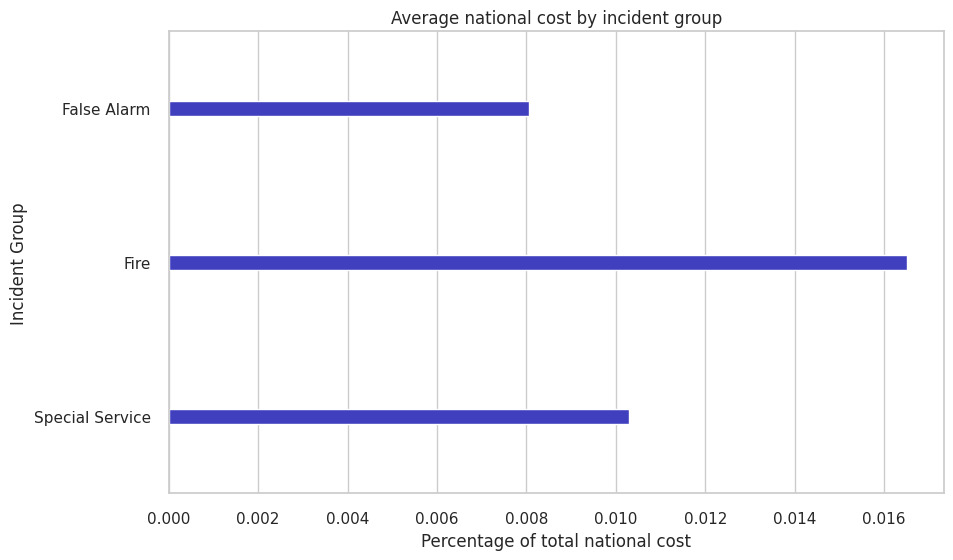

In [ ]:
cost_by_incident = data_trimmed.groupby('IncidentGroup')['Notional Cost (£)'].mean()
total_cost = data_trimmed['Notional Cost (£)'].sum()
percentages = (cost_by_incident / total_cost) * 100
# create a bar chart to visualize the average national cost for each incident group
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=percentages, y=cost_by_incident.index, color='blue',width=0.1, saturation=.5, ci=None,)
plt.xlabel('Percentage of total national cost')
plt.ylabel('Incident Group')
plt.title('Average national cost by incident group')
plt.show()

### Top 5 Property Categories by Percentage of Total National Cost

Category with highest total cost: Dwelling


Text(0.5, 1.0, 'Distribution of Property Categories by Total cost')

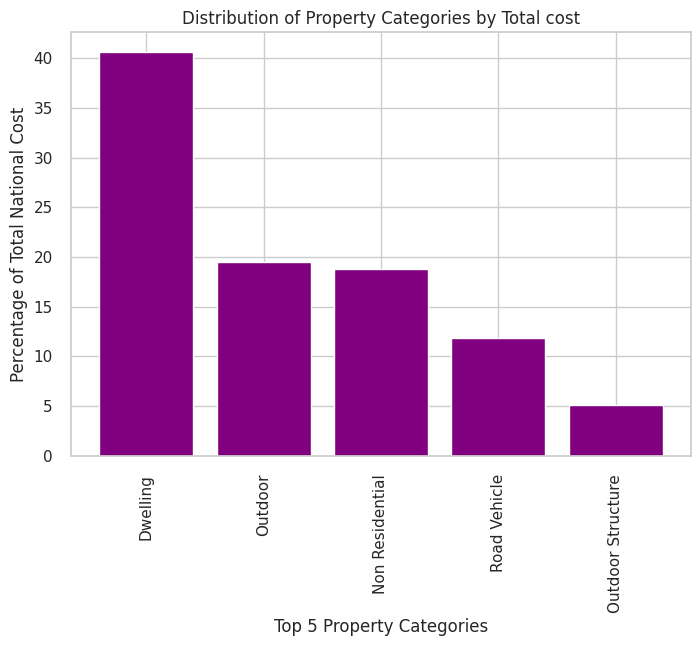

In [ ]:
total_cost_by_category = data_trimmed.groupby('PropertyCategory')['Notional Cost (£)'].sum()
category_with_highest_cost = total_cost_by_category.idxmax()
print("Category with highest total cost:", category_with_highest_cost)
# Calculate the overall sum of 'Notional Cost (£)' to obtain the total national cost
total_national_cost = data_trimmed['Notional Cost (£)'].sum()

# Calculate the percentage of total national cost for each property category
percentages = (total_cost_by_category / total_national_cost) * 100

top_categories = percentages.sort_values(ascending=False).head(5)

# Create a bar plot of the incident counts by property type
#plt.figure(figsize=(12,8))
plt.bar(top_categories.index, top_categories.values,color='purple')
plt.xticks(rotation=90)

# Add axis labels and a title
plt.xlabel('Top 5 Property Categories')
plt.ylabel('Percentage of Total National Cost')
plt.title('Distribution of Property Categories by Total cost')

### Property Category with most Pump Count
***the total number of times water was pumped at the incident***

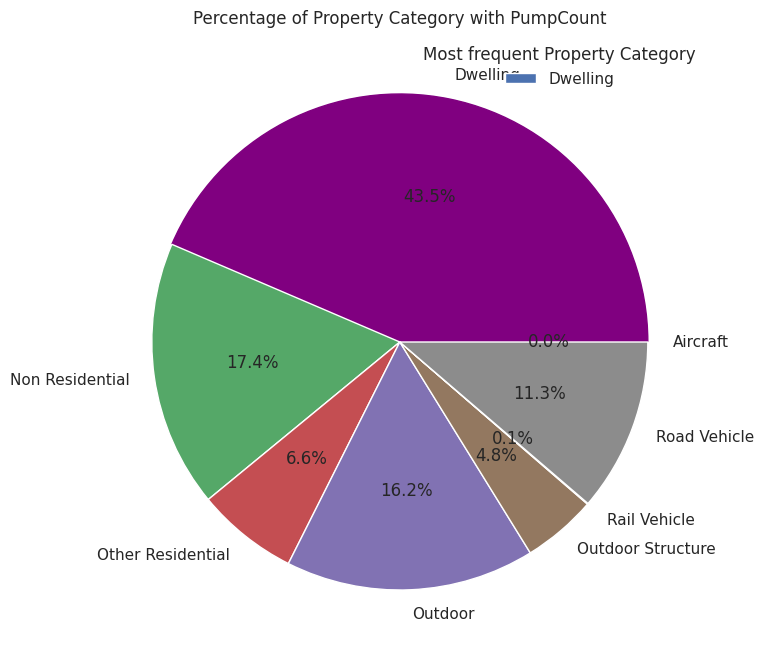

In [ ]:
# Group the data by PropertyCategory and sum the PumpCount
prop_cat_pumpcount = data_trimmed.groupby('PropertyCategory')['PumpCount'].sum()

# Find the PropertyCategory with the highest PumpCount
max_pumpcount_prop_cat = prop_cat_pumpcount.idxmax()

# Create a pie chart of the PropertyCategory distribution
plt.figure(figsize=(8,10))
plt.pie(prop_cat_pumpcount, labels=prop_cat_pumpcount.index, autopct='%1.1f%%')
plt.title('Percentage of Property Category with PumpCount')

# Highlight the most frequent PropertyCategory
max_pumpcount_index = prop_cat_pumpcount.index.get_loc(max_pumpcount_prop_cat)
plt.gca().patches[max_pumpcount_index].set_color('purple')
plt.legend(title='Most frequent Property Category', labels=[max_pumpcount_prop_cat])
plt.show()

### Response Time Analysis

*Examining the relationship between incident type and response time, to see if certain types of incidents tend to have faster or slower response times.*

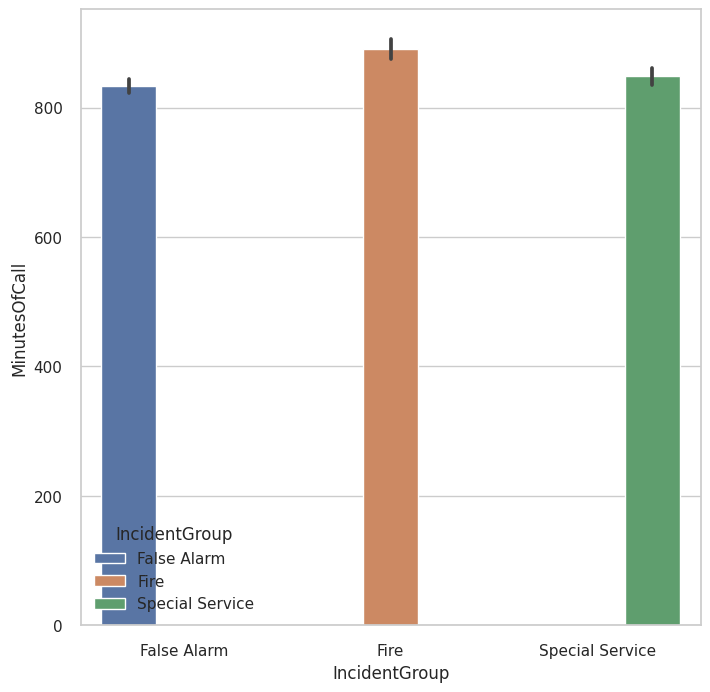

In [ ]:
# Convert the time of call to minutes
data_trimmed['MinutesOfCall'] = data_trimmed['TimeOfCall'].apply(lambda x: int(x[:2]) * 60 + int(x[3:5]))

# Bar plot of incident type and response time
plt.figure(figsize=(8,8))
sns.barplot(data=data_trimmed, x='IncidentGroup', y='MinutesOfCall', hue='IncidentGroup')
plt.show()

- From the bar chart we can see response time for Fire Incident is a bit higher than the other two

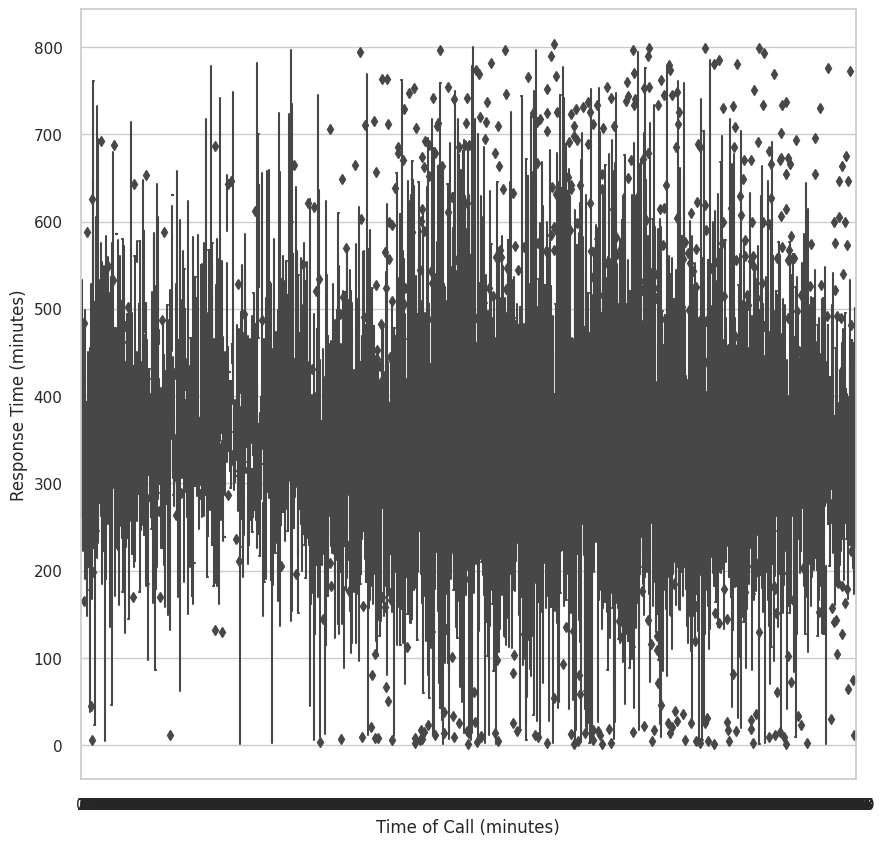



Predicted response time for a call made at 6:00 PM is :  5 hours


In [ ]:
from sklearn.linear_model import LinearRegression

# Plot a scatter plot of response time against time of call
plt.figure(figsize=(10,10))
sns.boxplot(data=data_trimmed,x='MinutesOfCall', y='FirstPumpArriving_AttendanceTime',palette="rainbow")
plt.xlabel('Time of Call (minutes)')
plt.ylabel('Response Time (minutes)')
plt.show()

# Train a linear regression model to predict response time based on time of call
x = data_trimmed['MinutesOfCall'].values.reshape(-1, 1)
y = data_trimmed['FirstPumpArriving_AttendanceTime'].values.reshape(-1, 1)
reg = LinearRegression().fit(x, y)

# Predict response time for a call made at time t
t = 1080  # time in minutes
predicted_response_time = reg.predict([[t]])

print('\n\nPredicted response time for a call made at 6:00 PM is : ', int(predicted_response_time[0][0]/60), 'hours')


# Descriptive Model - Clustering Analysis

In [ ]:
data_trimmed.dtypes

IncidentNumber                              object
DateOfCall                          datetime64[ns]
CalYear                                      int64
TimeOfCall                                  object
HourOfCall                                   int64
IncidentGroup                               object
StopCodeDescription                         object
PropertyCategory                            object
PropertyType                                object
Postcode_district                           object
IncGeo_WardNameNew                          object
IncidentStationGround                       object
FirstPumpArriving_AttendanceTime           float64
NumStationsWithPumpsAttending              float64
NumPumpsAttending                          float64
PumpCount                                  float64
Notional Cost (£)                          float64
NumCalls                                   float64
Month                                        int64
MinutesOfCall                  

### Select the numerical columns & standardize the data

In [ ]:
num_cols = ['CalYear', 'HourOfCall', 'FirstPumpArriving_AttendanceTime', 'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount', 'Notional Cost (£)', 'NumCalls']
df_num = data_trimmed[num_cols]

In [ ]:
check_null_values(df_num)

CalYear                             0
HourOfCall                          0
FirstPumpArriving_AttendanceTime    0
NumStationsWithPumpsAttending       0
NumPumpsAttending                   0
PumpCount                           0
Notional Cost (£)                   0
NumCalls                            0
dtype: int64


### Correlation Analysis on Numerical Columns

<Axes: >

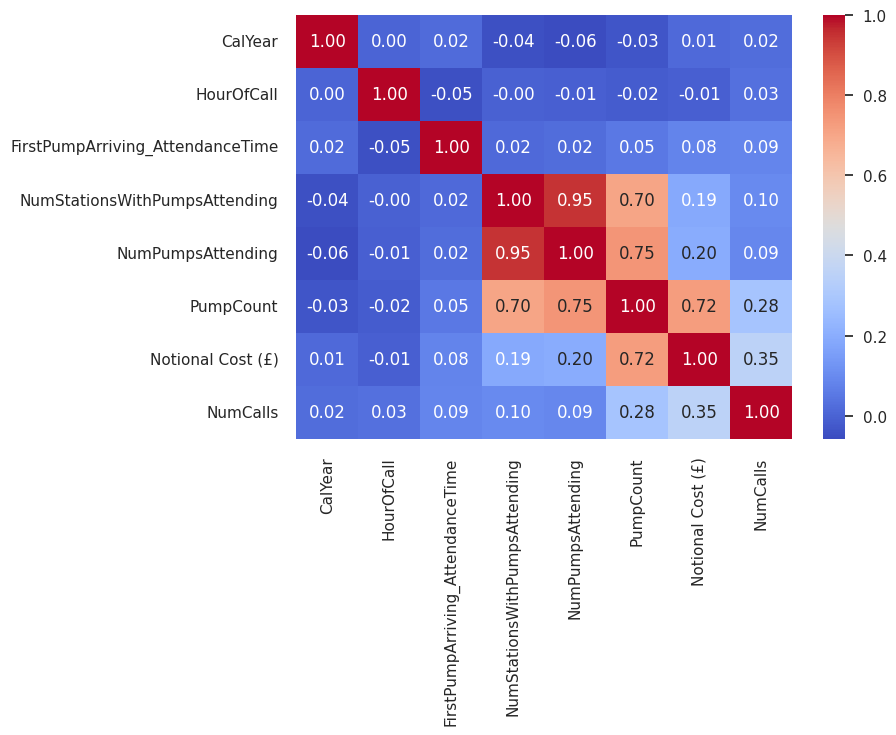

In [ ]:
corr = df_num.corr()
# Plot the correlation matrix using a heatmap
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')

In [ ]:
corr_res = corr['Notional Cost (£)'].sort_values(ascending=False)
print(corr_res)

Notional Cost (£)                   1.000000
PumpCount                           0.724943
NumCalls                            0.353304
NumPumpsAttending                   0.197252
NumStationsWithPumpsAttending       0.187439
FirstPumpArriving_AttendanceTime    0.079994
CalYear                             0.014962
HourOfCall                         -0.007560
Name: Notional Cost (£), dtype: float64


### Feature Scaling

In [ ]:
scaler = StandardScaler()
scaler.fit(df_num)
X = scaler.transform(df_num)
df_scale = pd.DataFrame(X, columns=df_num.columns)
df_scale.head()

,CalYear,HourOfCall,FirstPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,Notional Cost (£),NumCalls
0,-1.429329,-2.223269,-0.496339,-0.588995,-0.606822,-0.500397,-0.229408,-0.248184
1,-1.429329,-2.061042,0.393638,-0.588995,-0.606822,-0.500397,-0.229408,-0.248184
2,-1.429329,-1.898816,0.486505,-0.588995,-0.606822,-0.500397,-0.229408,0.333983
3,-1.429329,-0.114322,-0.751724,1.100161,0.931177,0.580577,-0.229408,-0.248184
4,-1.429329,1.345718,1.059187,-0.588995,-0.606822,-0.500397,-0.229408,-0.248184


### Elbow Method Function

In [ ]:
def elbow_method(X):
  # Instantiate the clustering model and visualizer
  km = KMeans(random_state=42)
  visualizer = KElbowVisualizer(km, k=(1,10))
  visualizer.fit(X)        # Fit the data to the visualizer
  visualizer.show()        # Finalize and render the figure

### Elbow Methods to find best K on orginal datasets

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

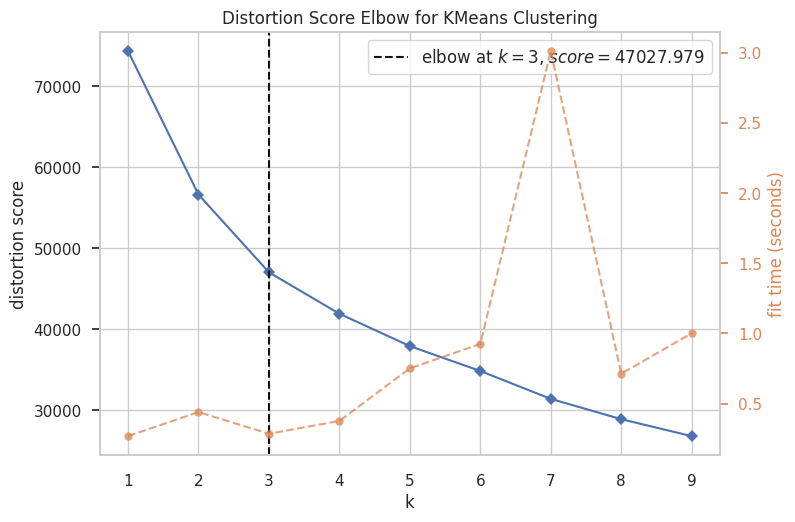

In [ ]:
elbow_method(df_scale)

### Shilhouette Score Function

In [ ]:
def silhouette_score_fun(data):
  kmeans = KMeans(n_clusters=3, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(data)
  print('KMeans Silhouette Score: {}'.format(silhouette_score(data, kmeans.labels_, metric='euclidean')))
  labels_scale = kmeans.labels_
  clusters_scale = pd.concat([data, pd.DataFrame({'cluster_scaled':labels_scale})], axis=1)

In [ ]:
def silhouette_avg_score(df):
  range = [2, 3, 4, 5, 6, 7, 8, 9]
  res = []
  for c in range:
    cluster = KMeans(init='k-means++',n_clusters=c,n_init=100,random_state=0)
    cluster_labels = cluster.fit_predict(df)
    silhouette_avg = silhouette_score(df,cluster_labels)
    res.append([c,silhouette_avg])
  result = pd.DataFrame(res,columns=["n_clusters","silhouette_score"])
  pivot_km = pd.pivot_table(result,index="n_clusters",values="silhouette_score")

  plt.figure()
  sns.heatmap(pivot_km,annot=True,linewidths=.2,fmt='.3f',cmap=sns.cm.rocket_r)
  plt.tight_layout()

### Find Best K on Orginal Data using Silhouette Score

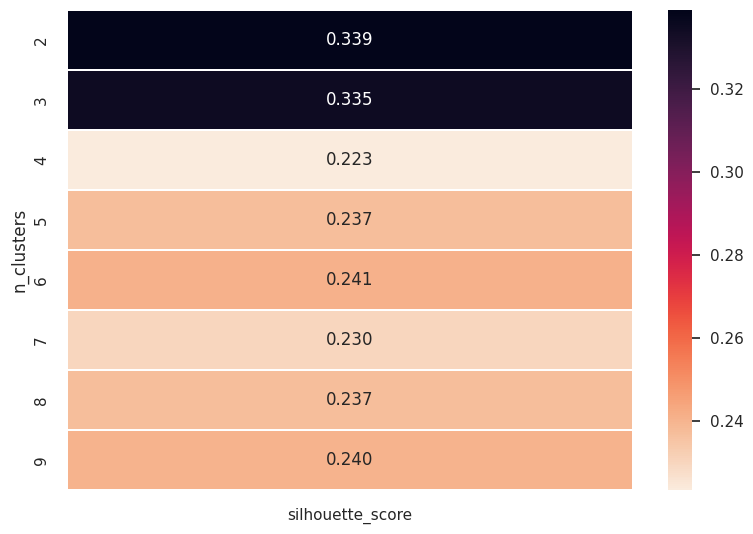

In [ ]:
silhouette_avg_score(df_scale)

### Silhouette Plot Functon

In [ ]:
def silhouette_plot(x):
  fig, ax = plt.subplots(2, 2, figsize=(15,8))
  for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='sns_bright', ax=ax[q-1][mod])
    visualizer.fit(x) 

### Feature Reduction via PCA

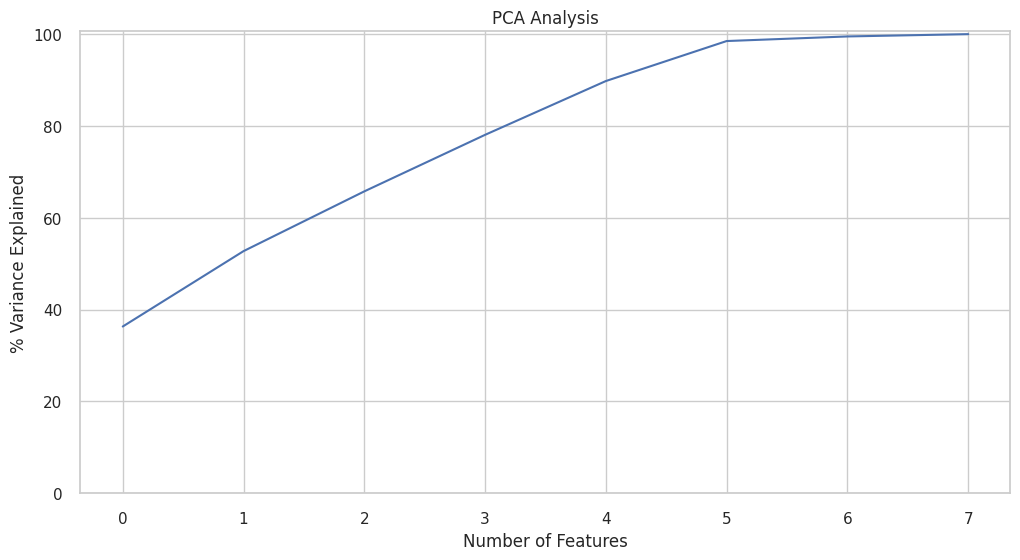

In [ ]:
#n_components=7 because we have 7 features in the dataset
pca = PCA(n_components=8)
pca.fit(df_scale)
variance = pca.explained_variance_ratio_
var = np.cumsum(np.round(variance, 3)*100)
plt.figure(figsize=(12,6))
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5) 
plt.plot(var)

In [ ]:
pca = PCA(n_components=3)
pca_scale = pca.fit_transform(df_scale)
pca_df_scale = pd.DataFrame(pca_scale, columns=['pc1','pc2','pc3'])
print(pca.explained_variance_ratio_)

[0.36328863 0.16412122 0.12981711]


### Applying KMeans to PCA Principal Components

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

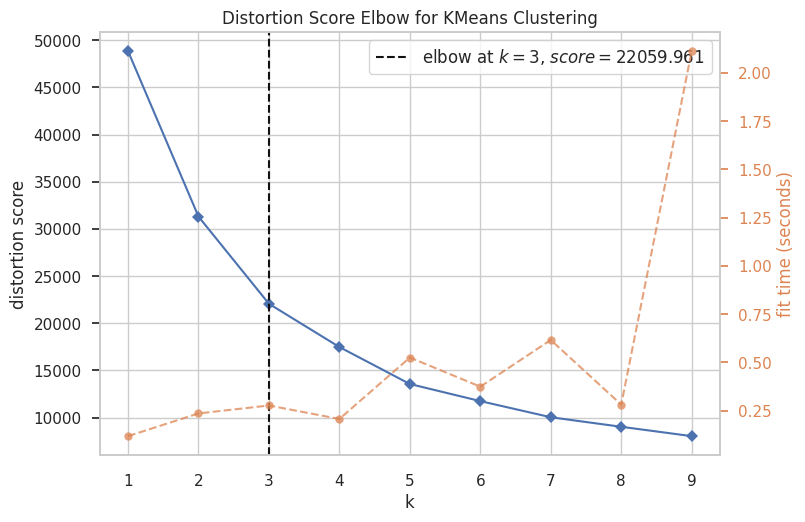

In [ ]:
elbow_method(pca_df_scale)

### KMeans PCA Scaled Silhouette Score

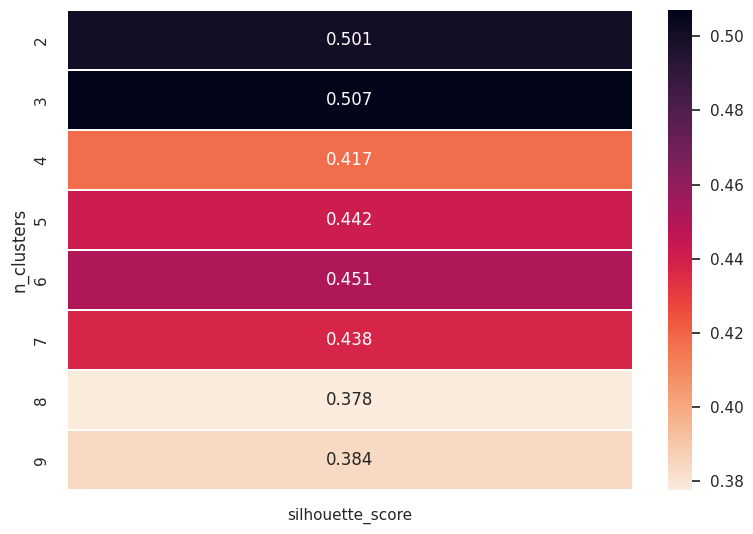

In [ ]:
silhouette_avg_score(pca_df_scale)

###  Feature Reduction via t-SNE

In [ ]:
'''tsne = TSNE(n_components=3, verbose=1, perplexity=80, n_iter=5000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(df_scale)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()'''

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 9289 samples in 0.010s...
[t-SNE] Computed neighbors for 9289 samples in 1.441s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9289
[t-SNE] Computed conditional probabilities for sample 2000 / 9289
[t-SNE] Computed conditional probabilities for sample 3000 / 9289
[t-SNE] Computed conditional probabilities for sample 4000 / 9289
[t-SNE] Computed conditional probabilities for sample 5000 / 9289
[t-SNE] Computed conditional probabilities for sample 6000 / 9289
[t-SNE] Computed conditional probabilities for sample 7000 / 9289
[t-SNE] Computed conditional probabilities for sample 8000 / 9289
[t-SNE] Computed conditional probabilities for sample 9000 / 9289
[t-SNE] Computed conditional probabilities for sample 9289 / 9289
[t-SNE] Mean sigma: 0.357989
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.798889


KeyboardInterrupt: ignored

### Elbow Method on TSNE scaled data

In [ ]:
elbow_method(tsne_df_scale)

NameError: ignored

### TSNE Silhouette score

In [ ]:
silhouette_avg_score(tsne_df_scale)

### Silhoutte Socre Comparison

In [ ]:
from yellowbrick.cluster import silhouette_visualizer
silhouette_visualizer(KMeans(2, random_state=42), df_scale, colors='yellowbrick')
silhouette_visualizer(KMeans(3, random_state=42), pca_df_scale, colors='yellowbrick')
silhouette_visualizer(KMeans(3, random_state=42), tsne_df_scale, colors='yellowbrick')


### Perform KMeans clustering with K=3 TSNE Scaled


In [ ]:

kmeans_tsne_scale = KMeans(n_clusters=3, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(tsne_df_scale)
print('KMeans tSNE Scaled Silhouette Score: {}'.format(silhouette_score(tsne_df_scale, kmeans_tsne_scale.labels_, metric='euclidean')))
labels_tsne_scale = kmeans_tsne_scale.labels_
clusters_tsne_scale = pd.concat([tsne_df_scale, pd.DataFrame({'tsne_clusters':labels_tsne_scale})], axis=1)
#plt.figure(figsize = (15,15))
sns.scatterplot(x=clusters_tsne_scale.iloc[:,0],y=clusters_tsne_scale.iloc[:,1],hue=labels_tsne_scale, palette='Set1', 
                s=100, alpha=0.6).set_title('Cluster VS TSNE Scaled Data', fontsize=15)
plt.legend()
plt.show()


In [ ]:
clusters_tsne_scale.value_counts()

### Visualize the clusters

In [ ]:
sns.pairplot(clusters_tsne_scale, hue='tsne_clusters', palette='Set1')
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps=0.3, min_samples=10).fit(tsne_df_scale)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

In [ ]:
print(f"Silhouette Coefficient: {metrics.silhouette_score(pca_df_scale, labels):.3f}")

In [ ]:
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [ ]:
df_time  = data.DateOfCall
df_time.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Date Of Call From 2019 - 2023')
plt.show()

In [ ]:
df_time.head()

### Clustering on National Cost

In [ ]:
# Select only the relevant columns for clustering
col = ['PumpCount', 'NumCalls', 'Notional Cost (£)']
df = data_trimmed[col]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-109-39db6dc1adbe>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.labels_


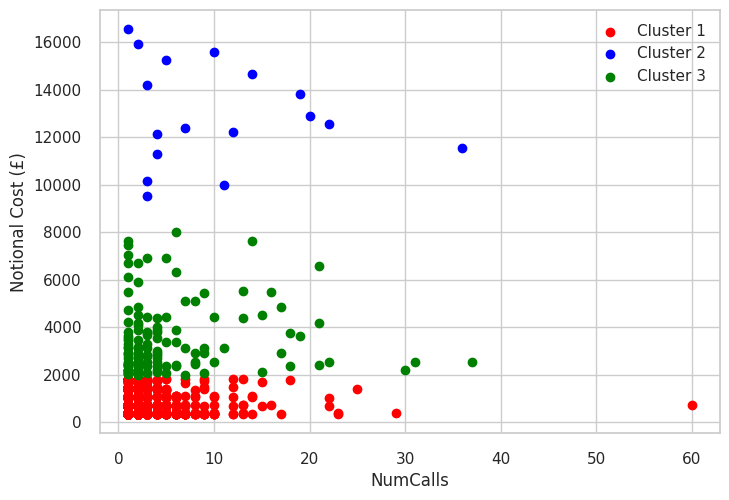

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(df)

# Add the cluster assignment to the dataframe
df['Cluster'] = kmeans.labels_
r = [0,1,2]
# Visualize the clusters using a scatter plot
colors = ['red', 'blue', 'green']
for i in r:
   plt.scatter(df[df['Cluster']==i]['NumCalls'], df[df['Cluster']==i]['Notional Cost (£)'], color=colors[i], label='Cluster '+str(i+1))
plt.xlabel('NumCalls')
plt.ylabel('Notional Cost (£)')
plt.legend()
plt.show()

In [ ]:
df.groupby('Cluster').mean()

,PumpCount,NumCalls,Notional Cost (£)
Cluster,,,
0,1.398008,1.351390,429.065222
1,12.647059,10.352941,12974.176471
2,4.470149,5.402985,3424.940299


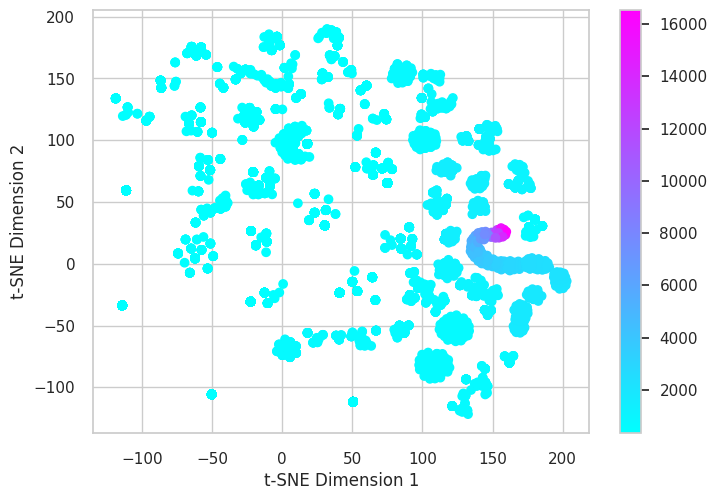

In [ ]:
# Run t-SNE on the data
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(df)

# Visualize the t-SNE result using a scatter plot
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['Notional Cost (£)'], cmap='cool')
plt.colorbar()
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


# Data Transformation
***Categorical to Numerical data conversion***

In [ ]:
data.dtypes

In [ ]:
len(data.columns)

### Converting Categorical to Numerical column

In [ ]:
numerical_data = data.drop('IncidentNumber', axis=1)

In [ ]:
data.columns

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Convert categorical variables to numerical ones
le = LabelEncoder()
# features = ['PropertyType', 'PropertyCategory', 'Postcode_district', 'TimeOfCall','IncGeo_WardNameNew']
numerical_data['TimeOfCall'] = le.fit_transform(data['TimeOfCall'])
numerical_data['IncidentGroup'] = le.fit_transform(data['IncidentGroup'])
numerical_data['PropertyCategory'] = le.fit_transform(data['PropertyCategory'])
numerical_data['PropertyType'] = le.fit_transform(data['PropertyType'])
numerical_data['Postcode_district'] = le.fit_transform(data['Postcode_district'])
numerical_data['IncGeo_WardNameNew'] = le.fit_transform(data['IncGeo_WardNameNew'])

numerical_data['DateOfCall'] = le.fit_transform(data['DateOfCall'])
numerical_data['StopCodeDescription'] = le.fit_transform(data['StopCodeDescription'])
numerical_data['IncidentStationGround'] = le.fit_transform(data['IncidentStationGround'])


In [ ]:
numerical_data.dtypes

# 3. Model Construction


# Predictive Modeling

### Model Constructions

In [ ]:
# Define the features (input variables) and target (output variable)
target = data['IncidentGroup']
features = ['PropertyType', 'PropertyCategory', 'Postcode_district', 'TimeOfCall','IncGeo_WardNameNew']
_df = numerical_data[features]
_df.head()

In [ ]:
scaler = StandardScaler()
scaler.fit(_df)
X = scaler.transform(_df)
scale = pd.DataFrame(X, columns=_df.columns)
scale.head()

In [ ]:
# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(scale, target, test_size=0.20, random_state=42)

# Plot the training set in blue and the test set in orange
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the training set in blue and the test set in orange
X_train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
X_test.plot(ax=ax, label='Test Set')
# Add a legend, title, and axis labels
ax.legend()
ax.set_title('Training and Test Sets')
ax.set_xlabel('Input Data')
ax.set_ylabel('Target Variable')
plt.show()

## K-Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
# Make predictions on the testing set
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


### Feature Importance

## Random Forest Classifier

In [ ]:

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)
# Make predictions on the testing set
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

In [ ]:
fi = pd.DataFrame(data=rf.feature_importances_,
             index=rf.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

----
# 4. Model Evaluation


In [ ]:
_df_test_knn = X_test.copy()
_df_test_knn['IncidentGroup'] = y_test
_df_test_knn['Prediction'] = knn.predict(X_test)

In [ ]:
def diff(df):
  df['Match'] = df['IncidentGroup'] == df['Prediction']
  match_count = len(df[df['Match'] == True])
  print("Number of incidents:", len(df['Prediction']))
  print("Number of correct incidents:", match_count)

In [ ]:
diff(_df_test_knn)

In [ ]:
_df_test_rf = X_test.copy()
_df_test_rf['IncidentGroup'] = y_test
_df_test_rf['Prediction'] = rf.predict(X_test)

In [ ]:
diff(_df_test_rf)

In [ ]:
def plot_pred(df,c1,c2):
  pred_counts = df.groupby('Prediction').size()
  inc_counts = df.groupby('IncidentGroup').size()

  # create a figure with two subplots
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

  # create a bar plot of Prediction counts
  ax1.bar(pred_counts.index, pred_counts.values,color=c1)
  ax1.set_xlabel('Prediction')
  ax1.set_ylabel('Count')

  # create a bar plot of IncidentGroup counts
  ax2.bar(inc_counts.index, inc_counts.values,color=c2)
  ax2.set_xlabel('IncidentGroup')
  ax2.set_ylabel('Count')

  # adjust the layout and spacing
  fig.tight_layout()

  # show the plot
  plt.show()


In [ ]:
plot_pred(_df_test_knn,'orange','green')

In [ ]:
plot_pred(_df_test_rf,'blue','purple')